# TIMIT Gestures Statistics

## Load Db and Calculate Gestures

In [13]:
import timit_stats as tist
import gesture as ges
import os
import matplotlib.pyplot as plt

%pylab inline

trans_dir = "../USC-TIMIT/EMA/Data/M1/trans"
mat_dir = "../USC-TIMIT/EMA/Data/M1/mat"

gestures = {}

for fname in os.listdir(trans_dir):
    fname = os.path.splitext(fname)[0]
    t_fname = os.path.join(trans_dir, fname + ".trans")
    mat_fname = os.path.join(mat_dir, fname + ".mat")
    gest = tist.calc_gestures(mat_fname, t_fname,filter_critical_points=True, m=0.03)
    for g in gest:
        if g not in gestures:
            gestures[g] = ges.Gesture(g)
        gestures[g].extend(gest[g])
print "gestures calculation finished"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


gestures calculation finished


## Plot Gestures

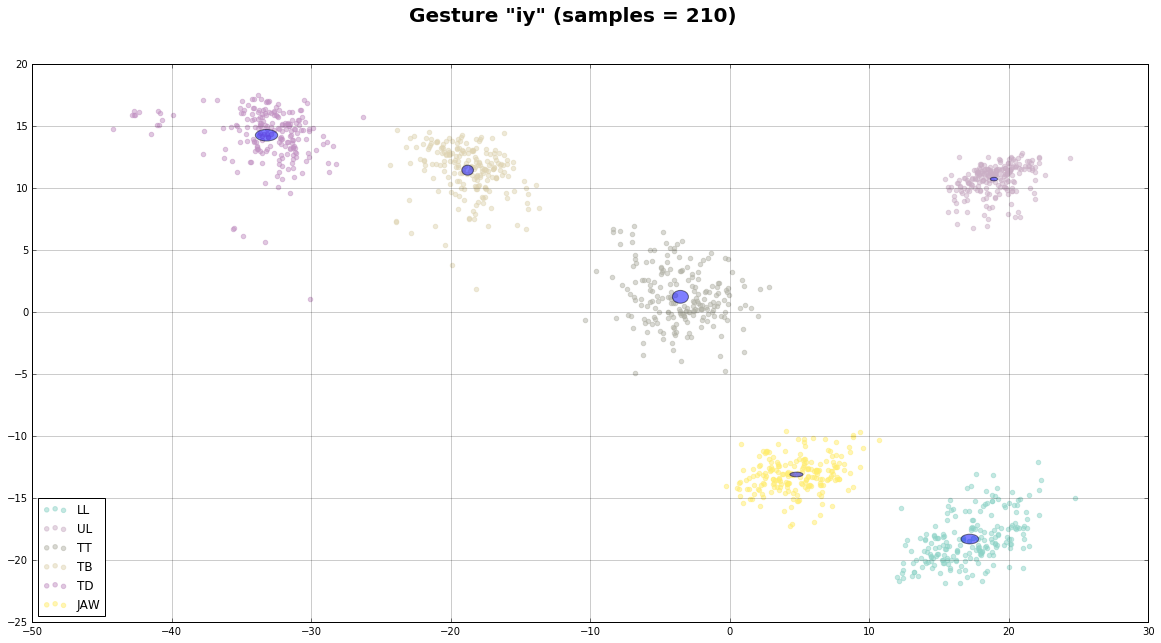

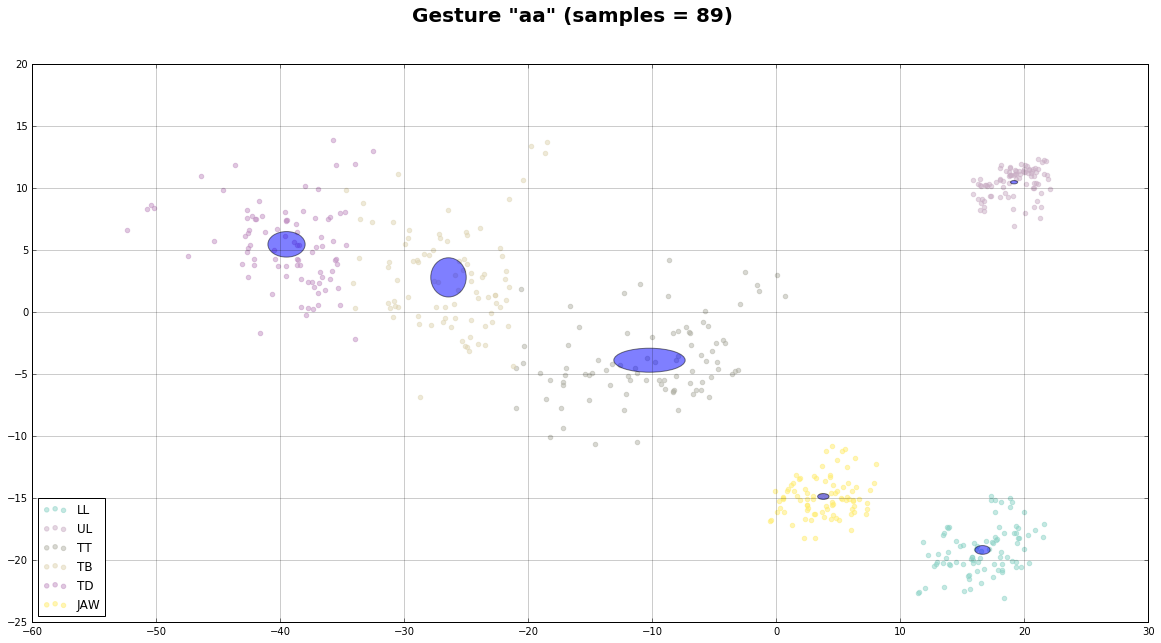

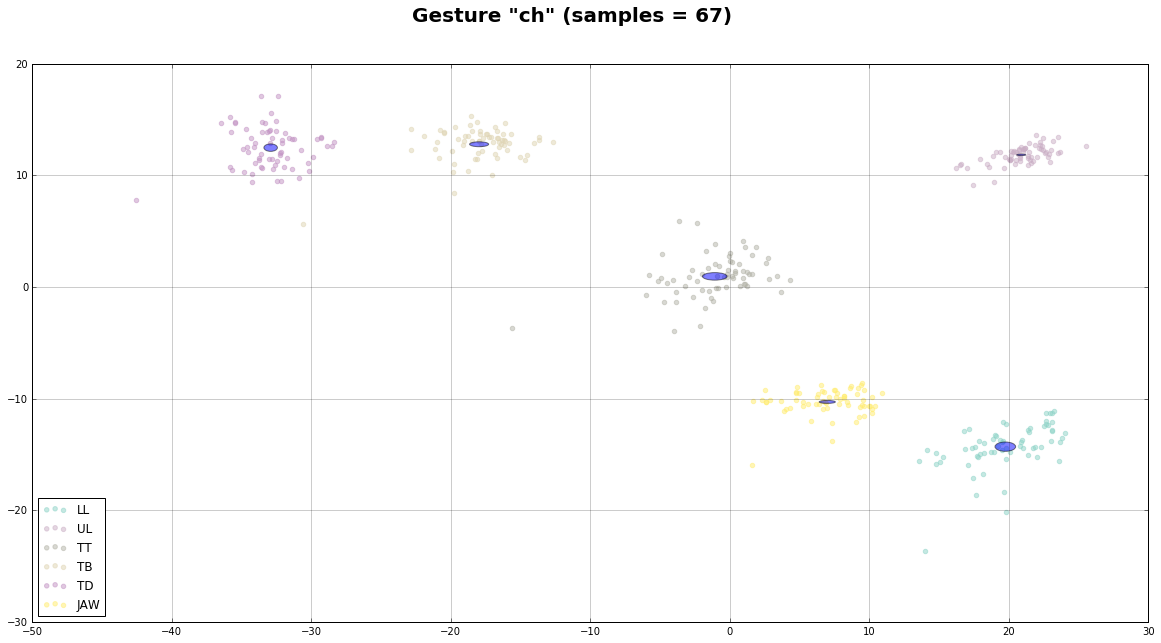

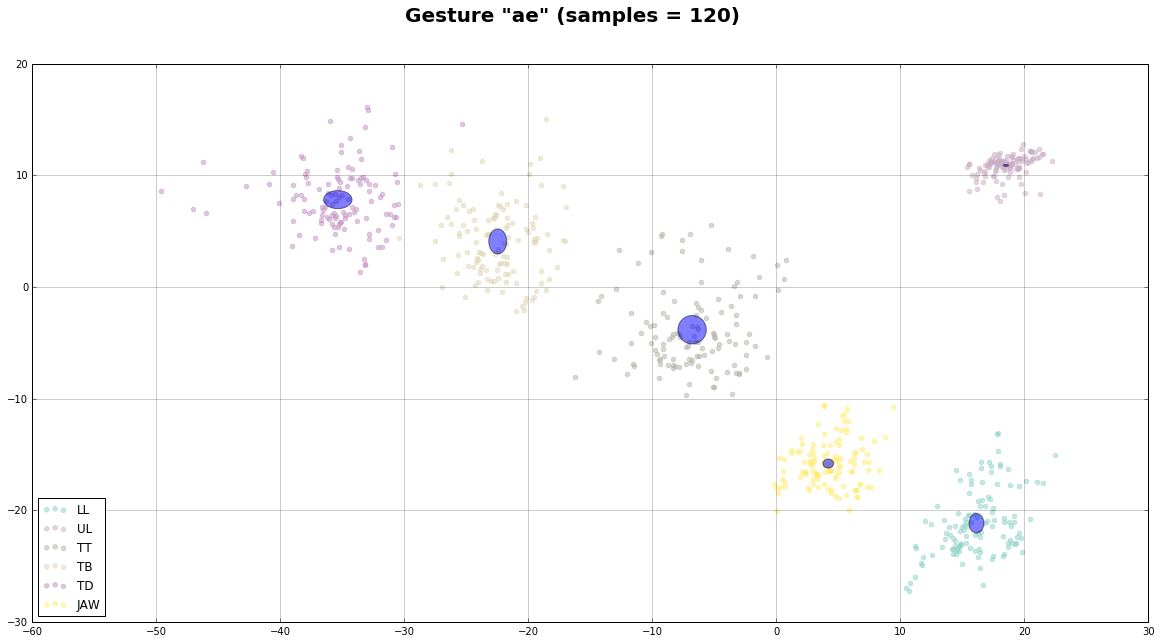

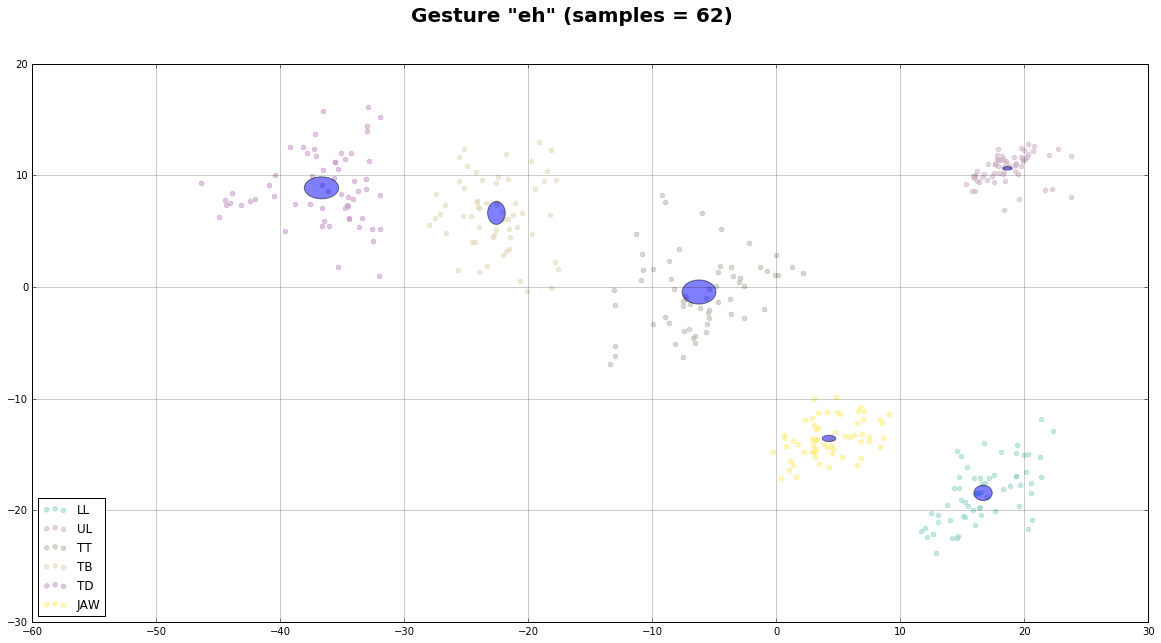

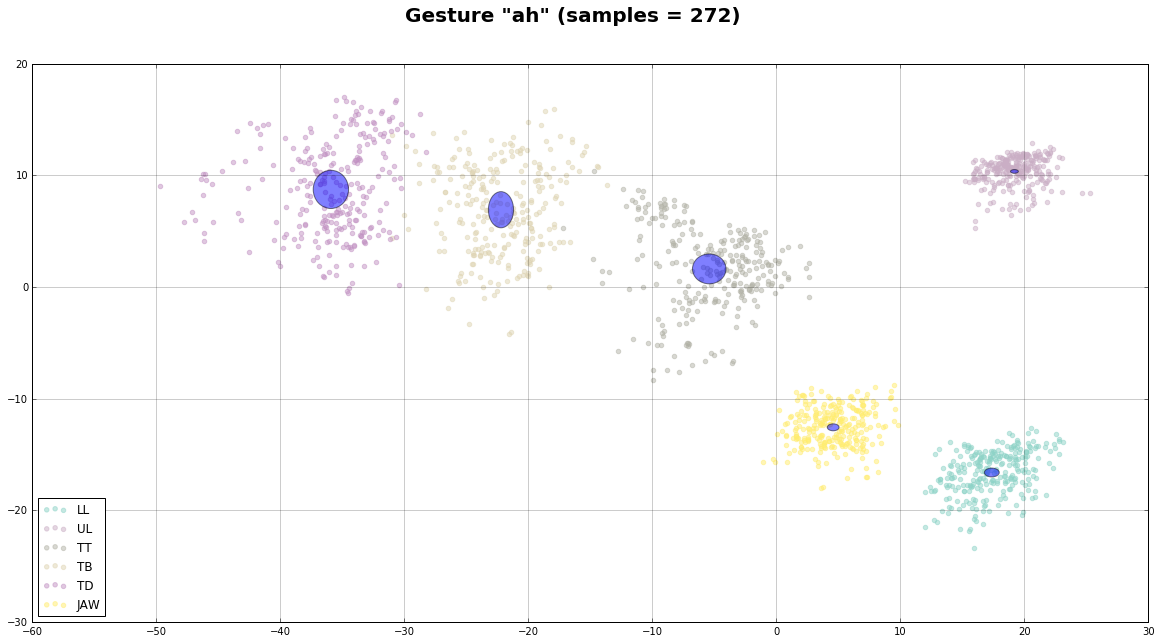

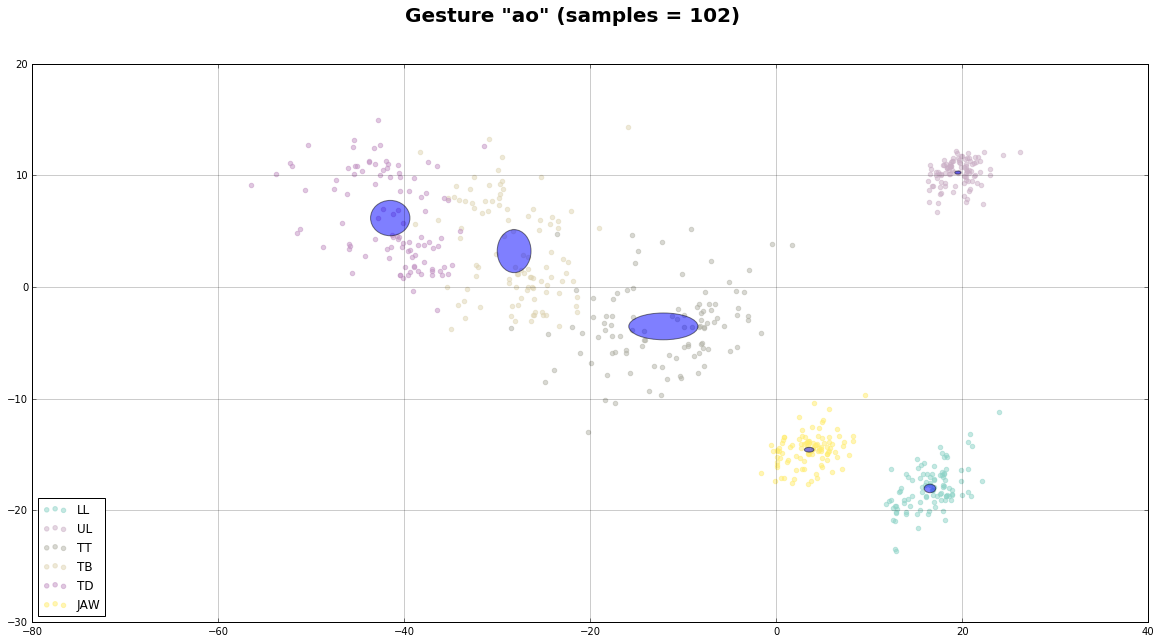

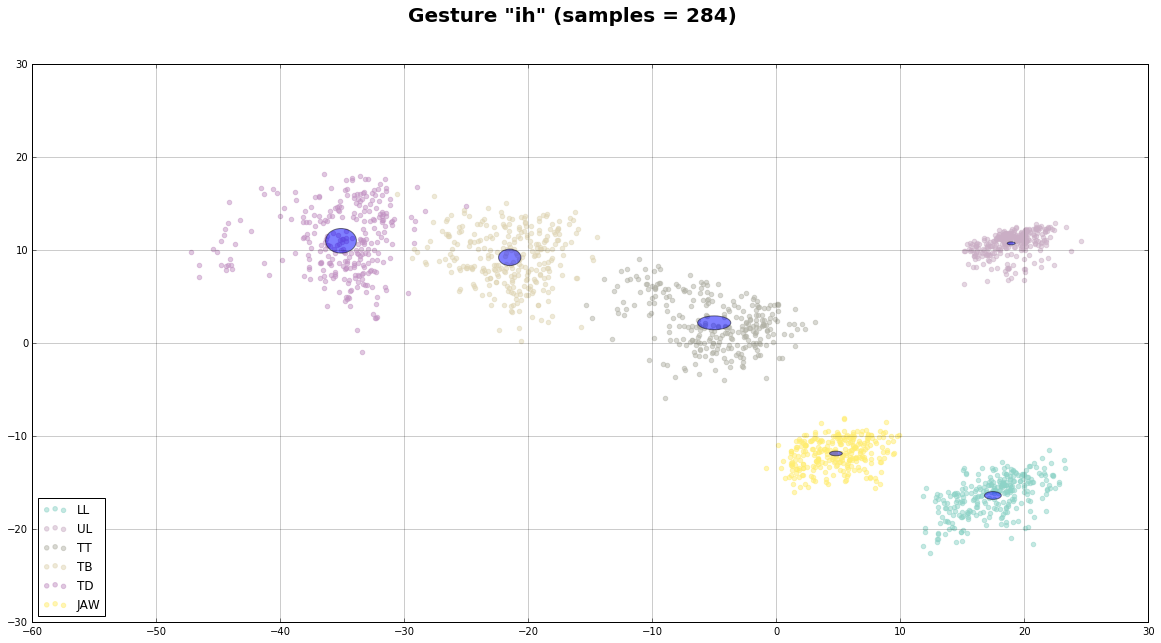

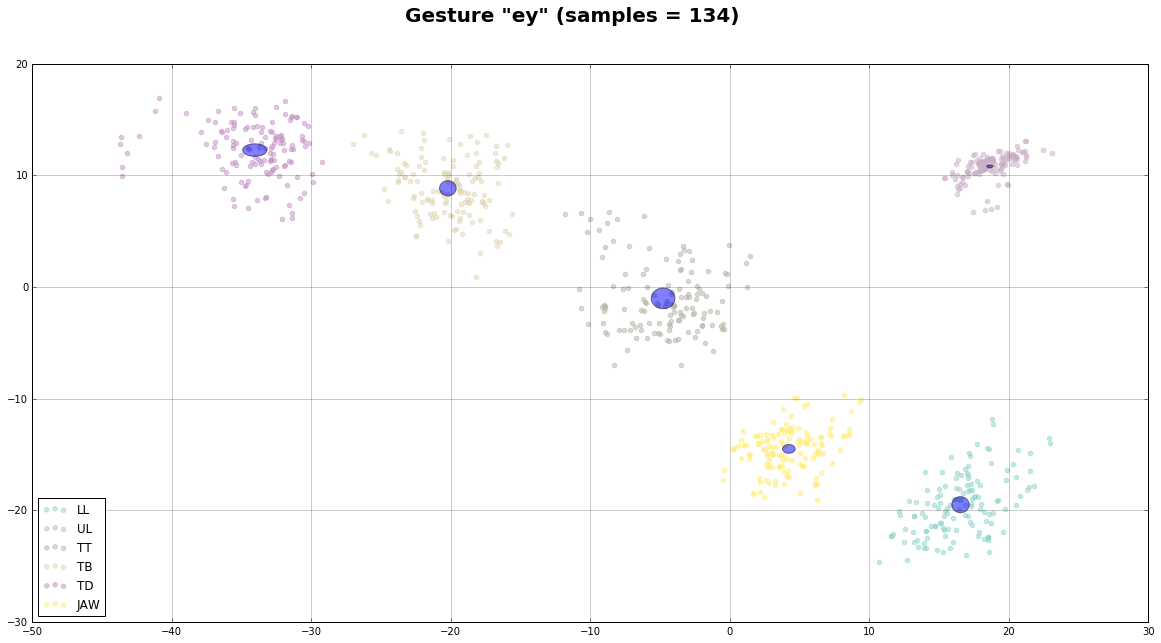

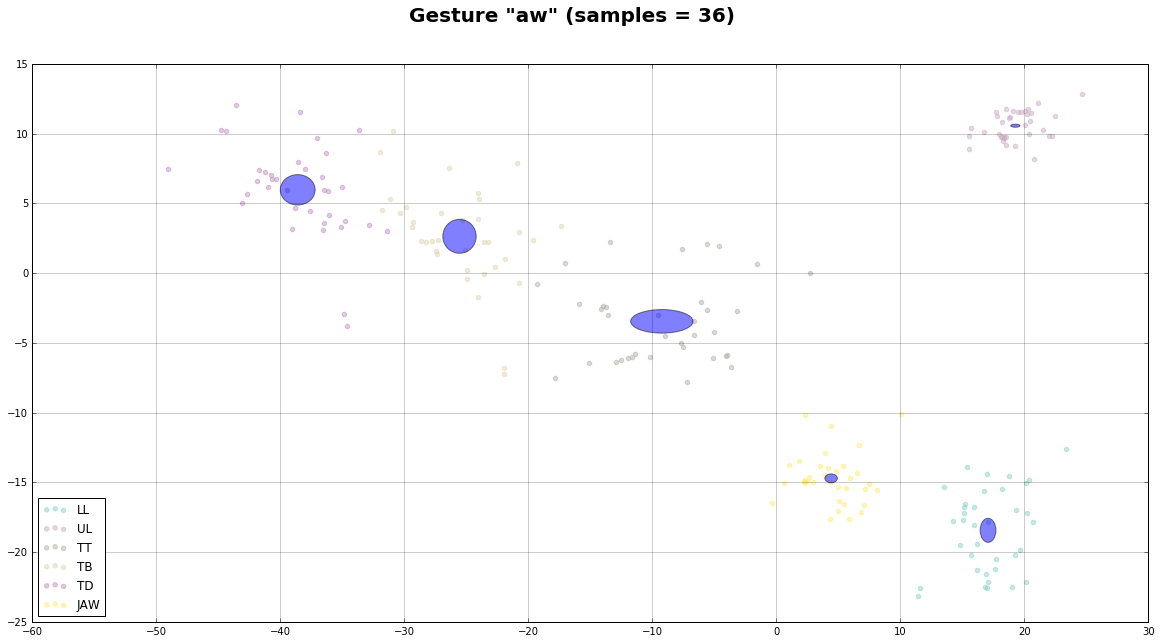

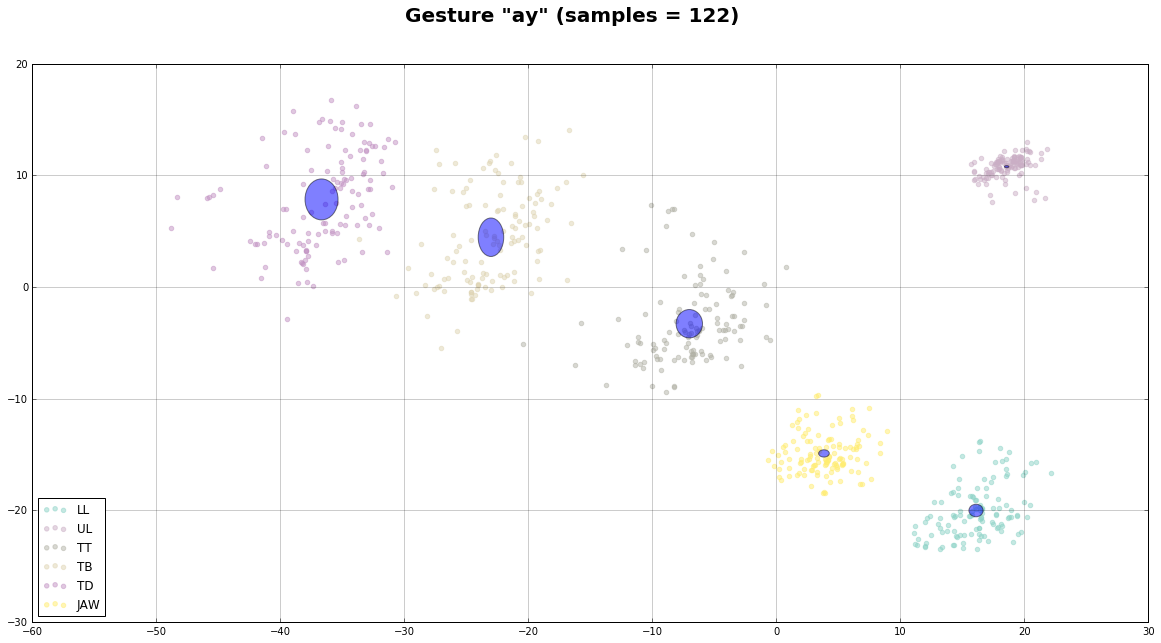

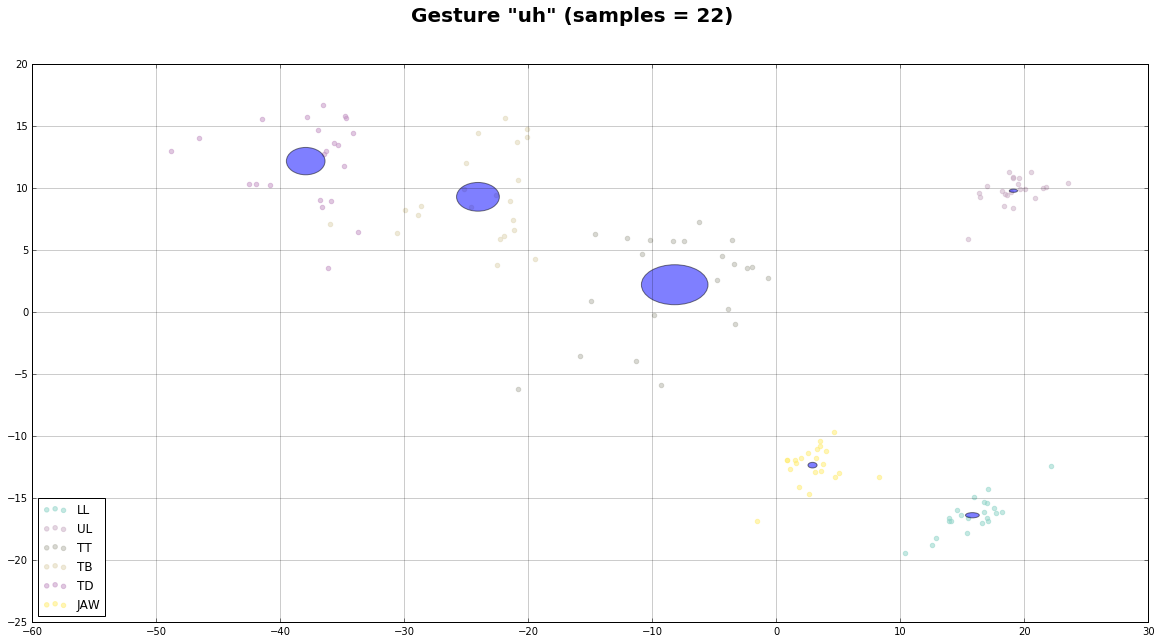

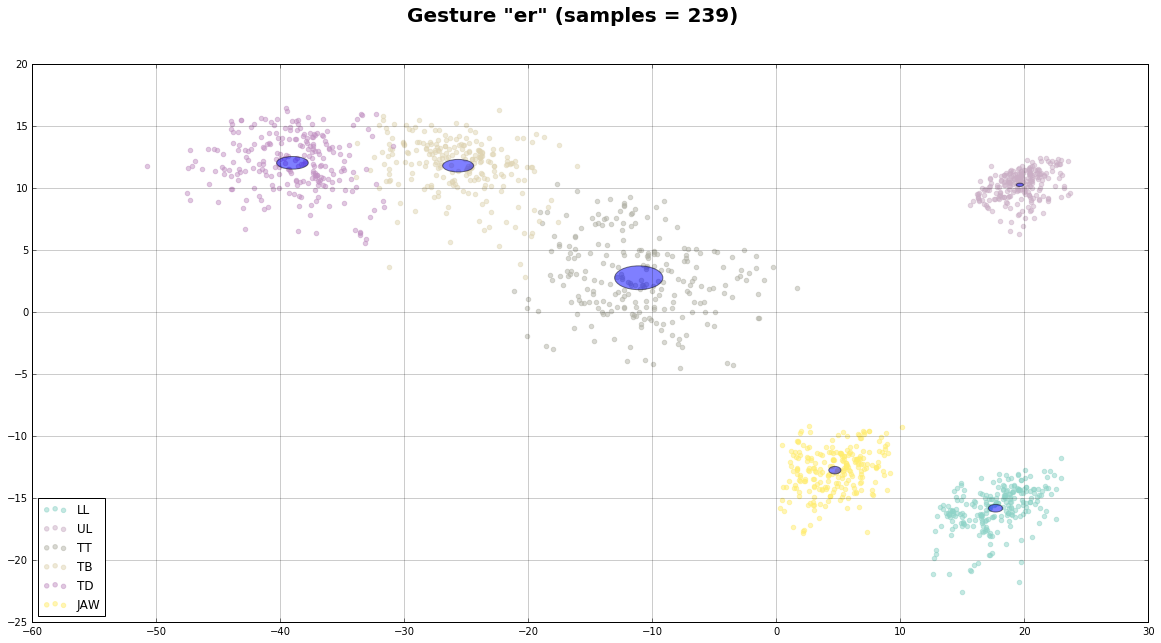

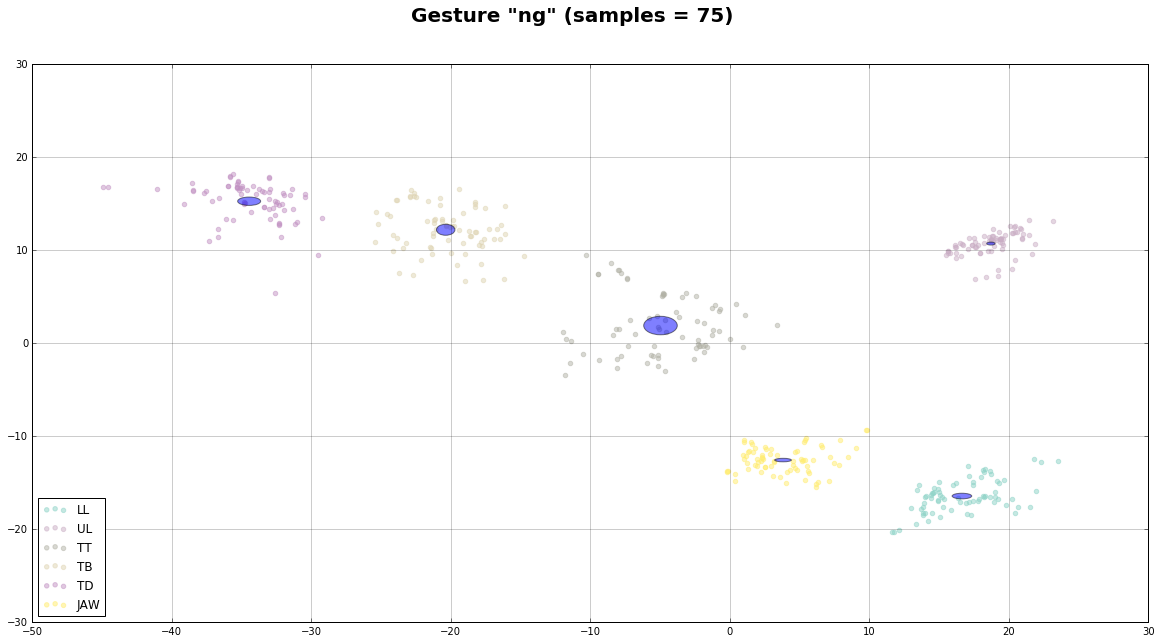

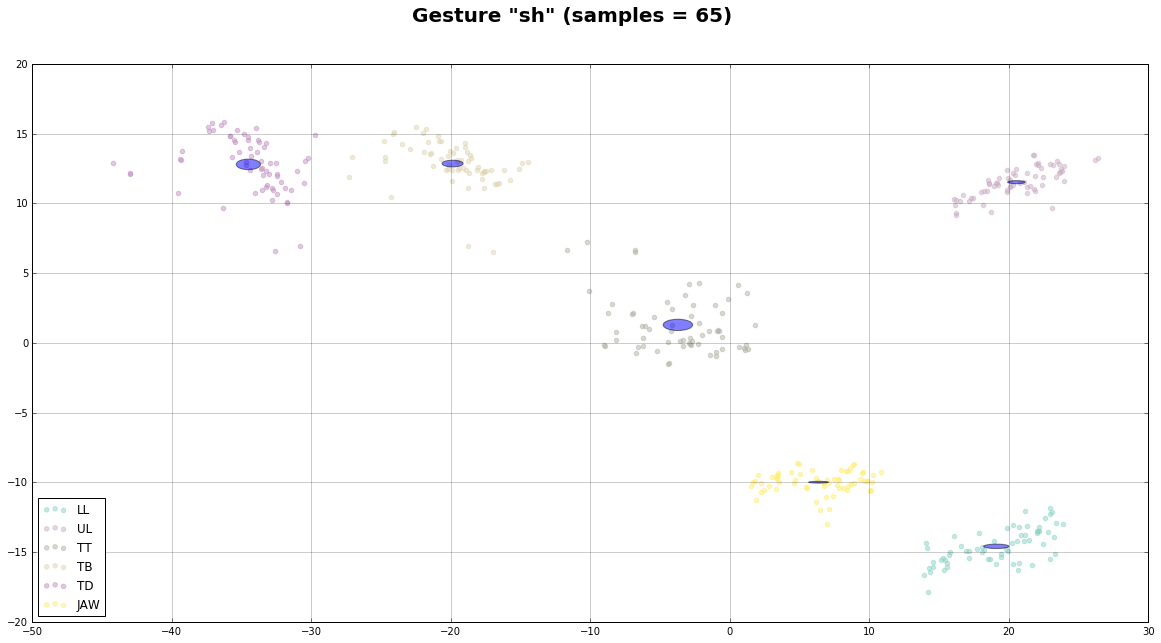

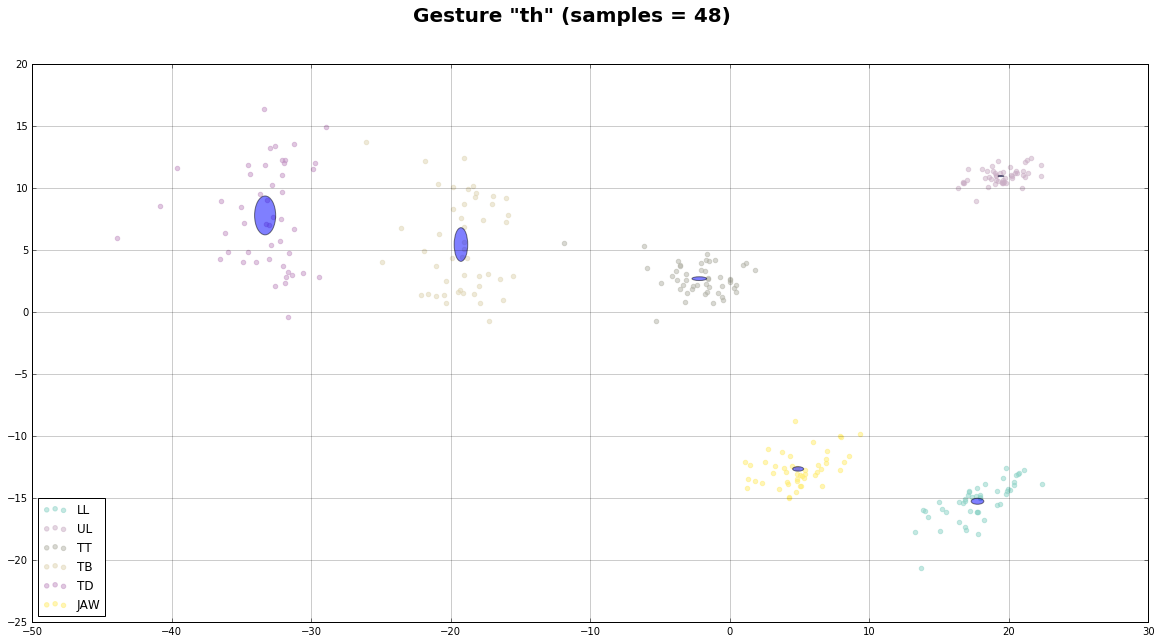

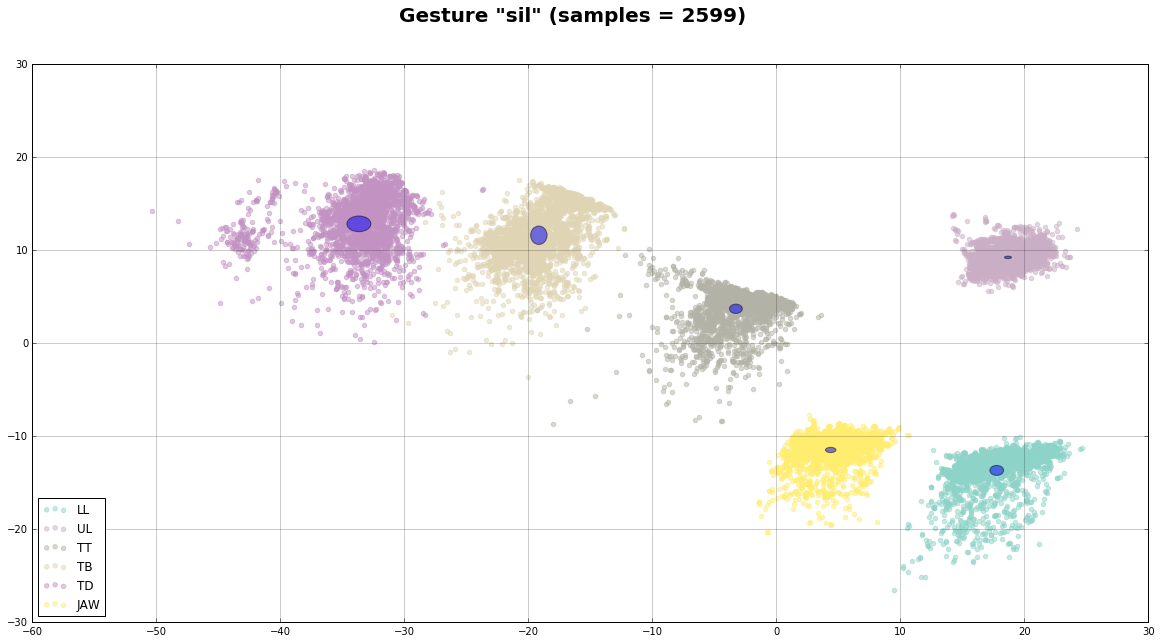

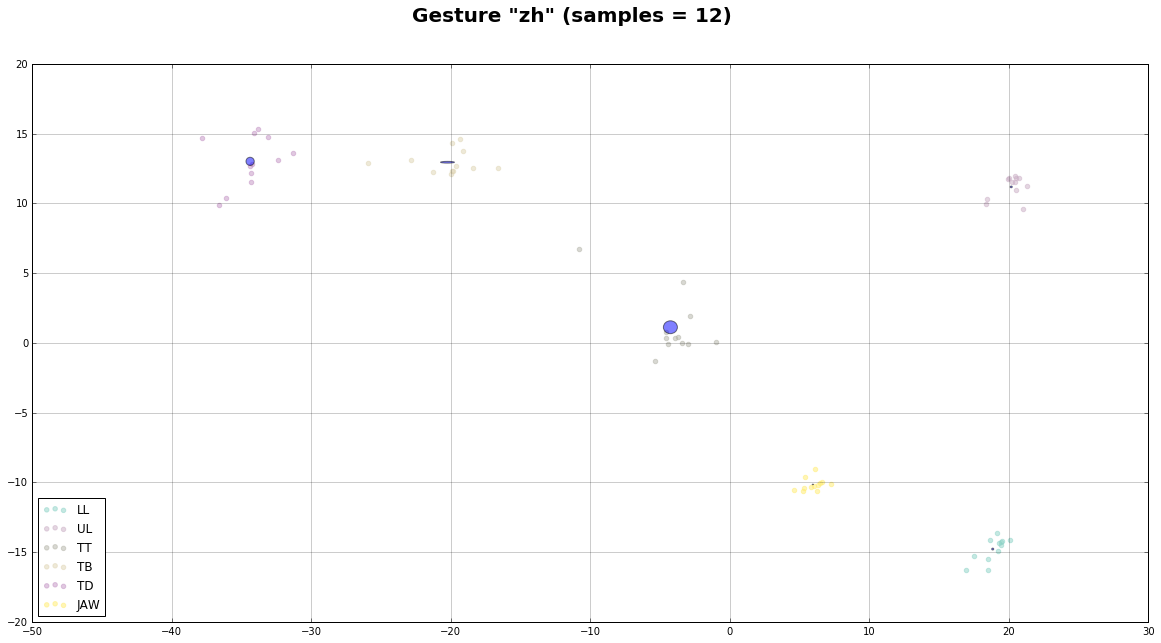

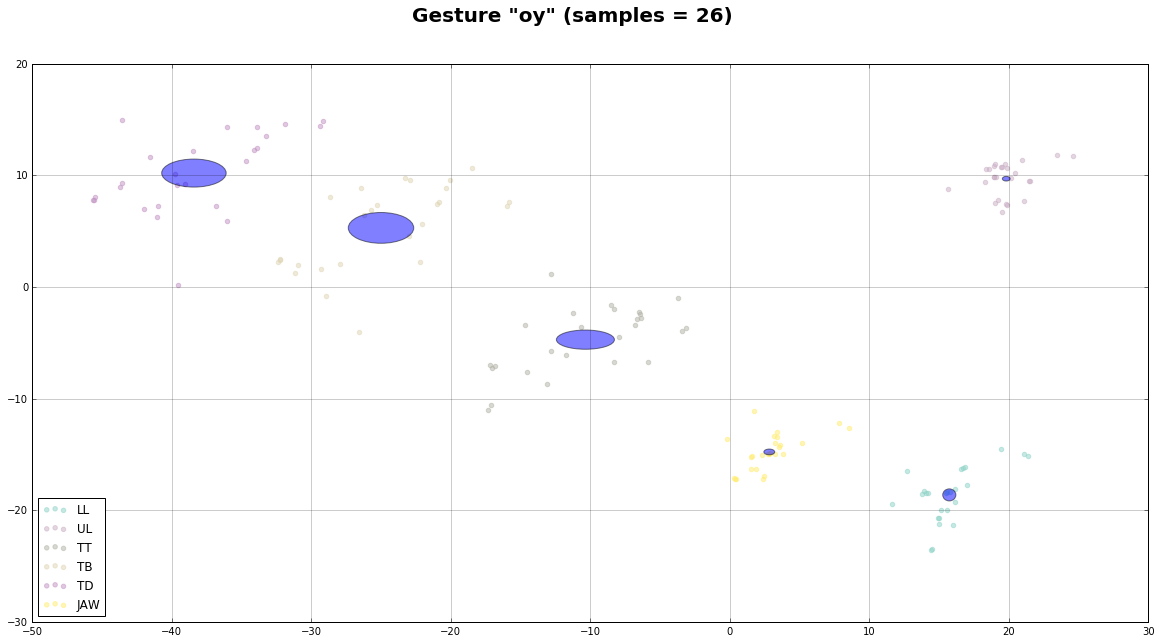

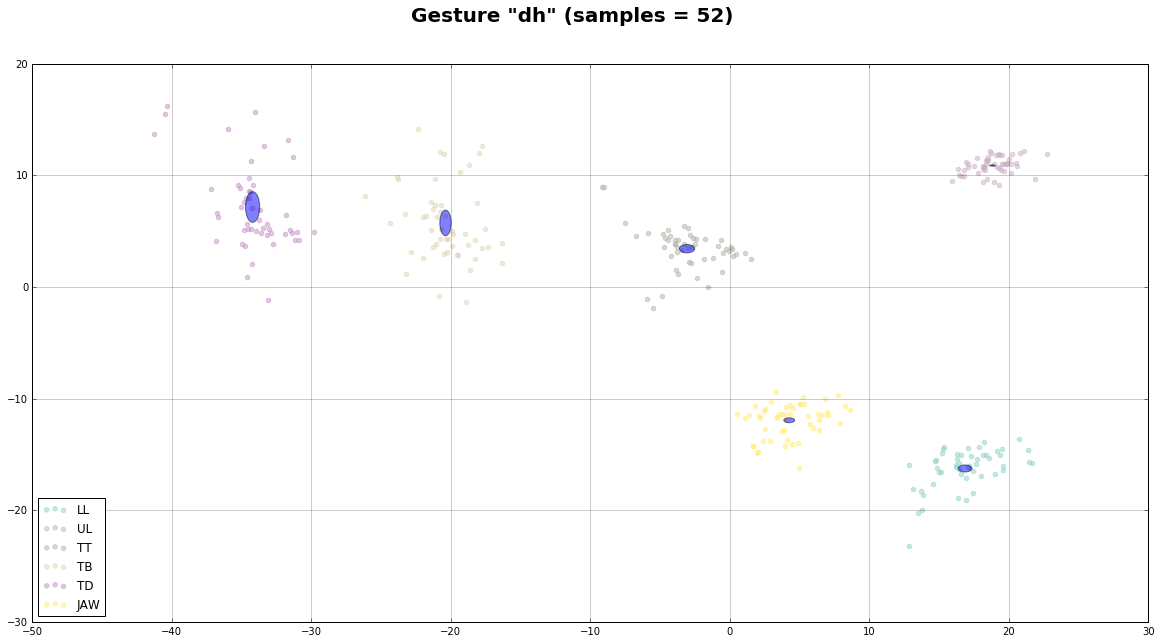

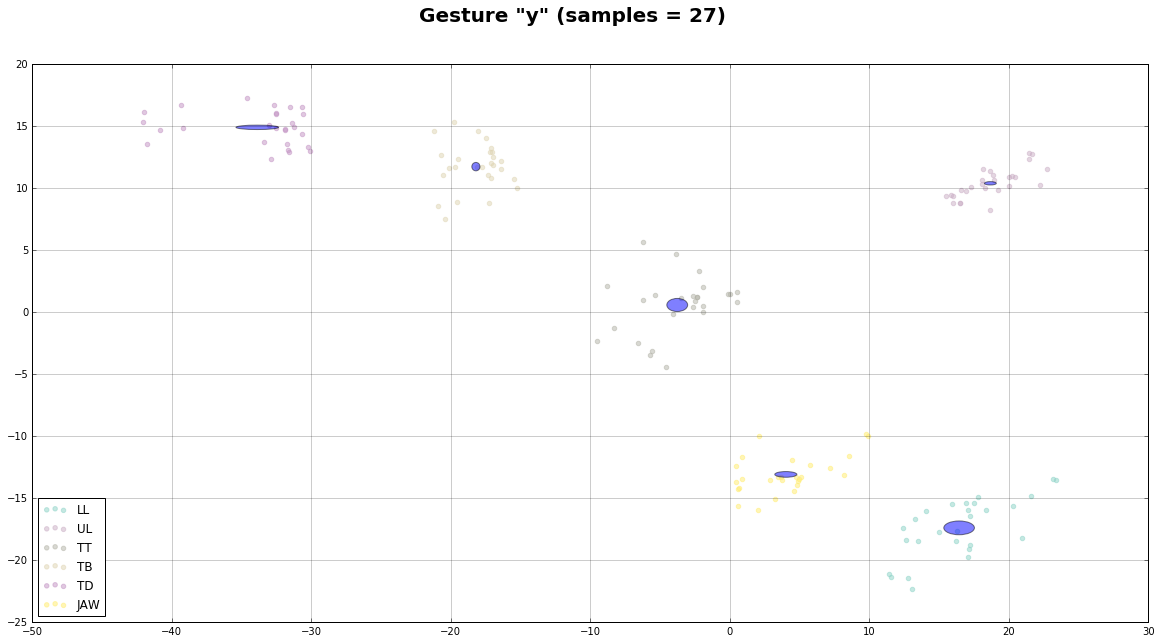

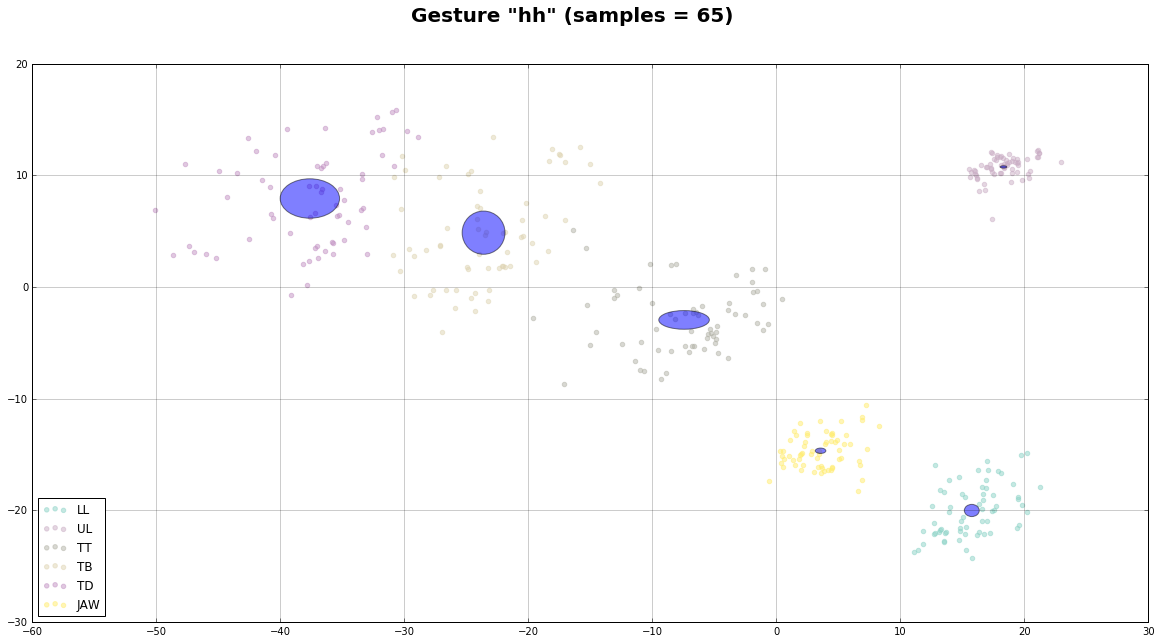

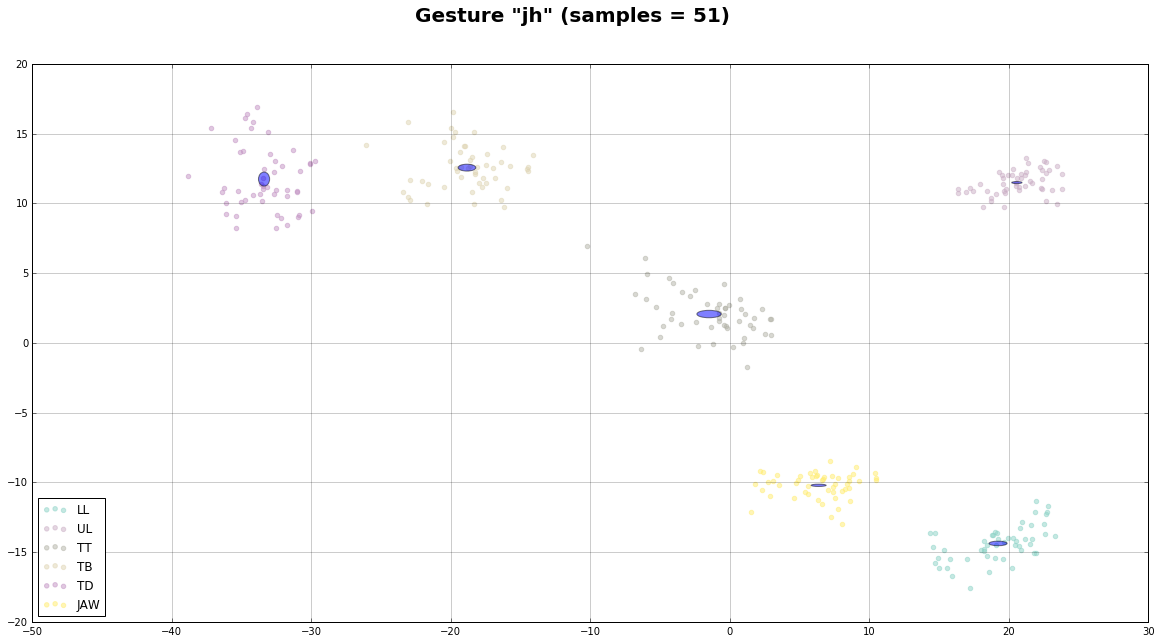

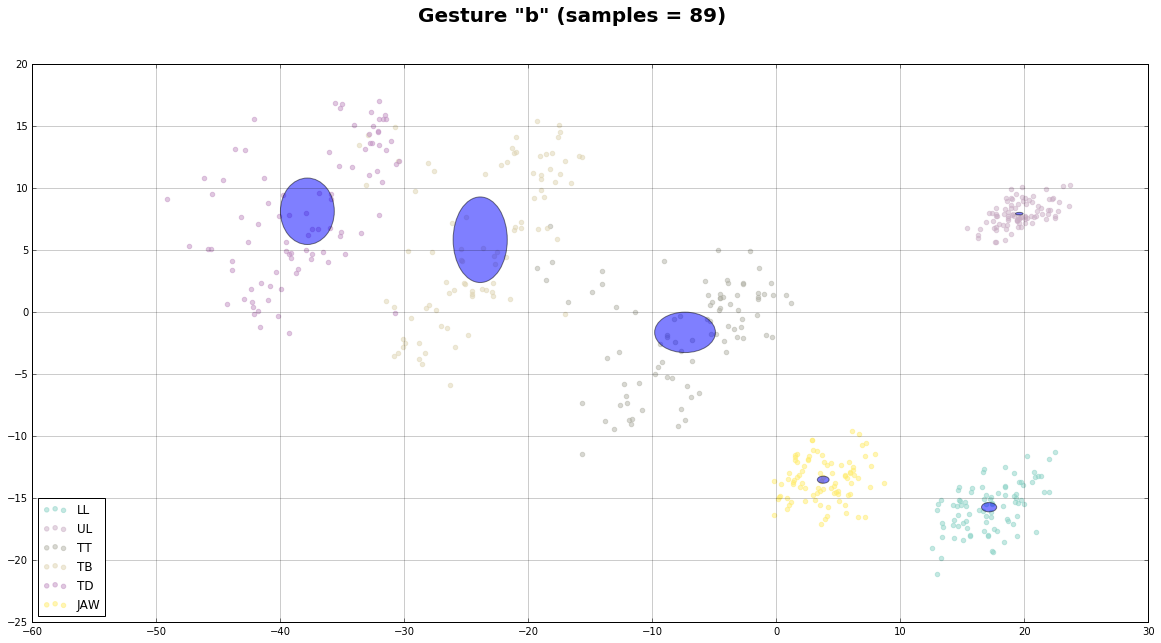

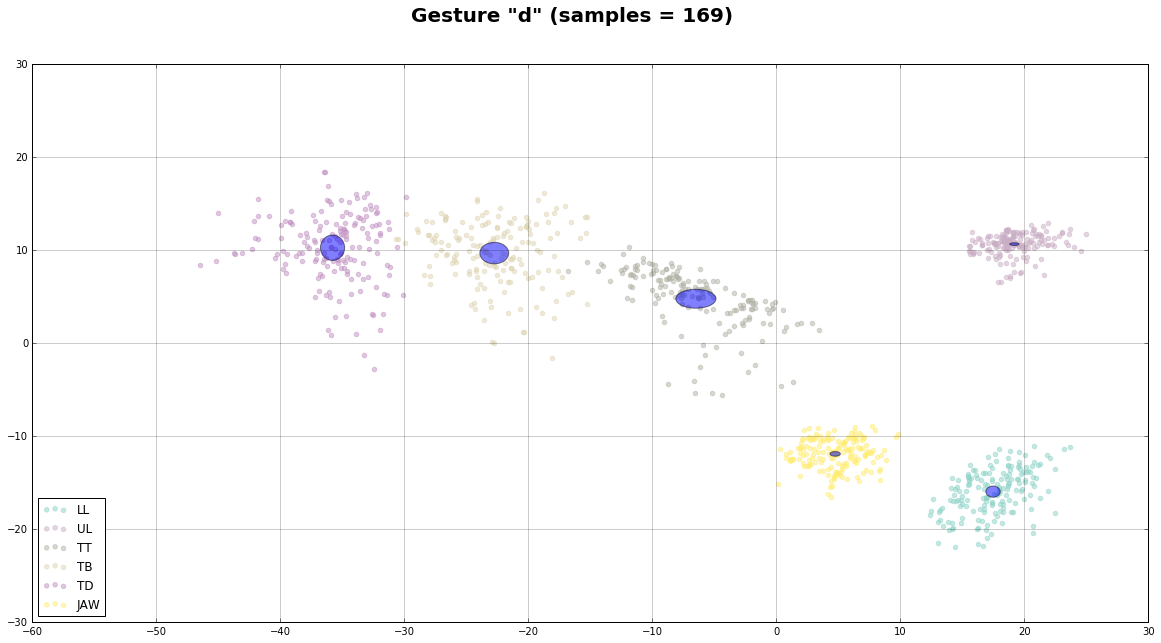

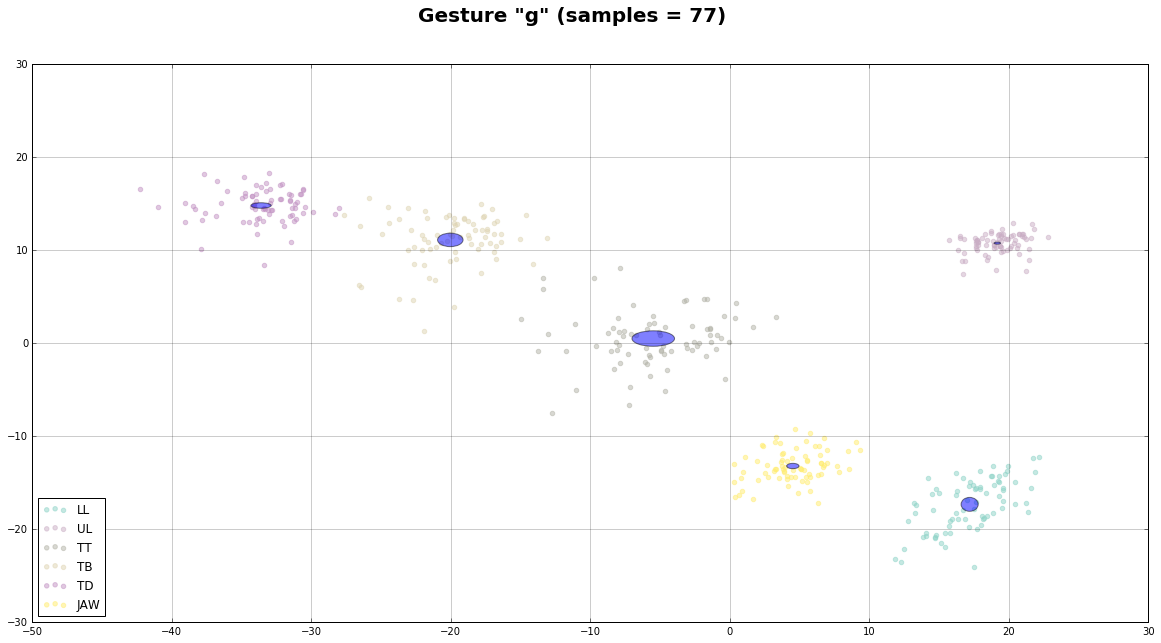

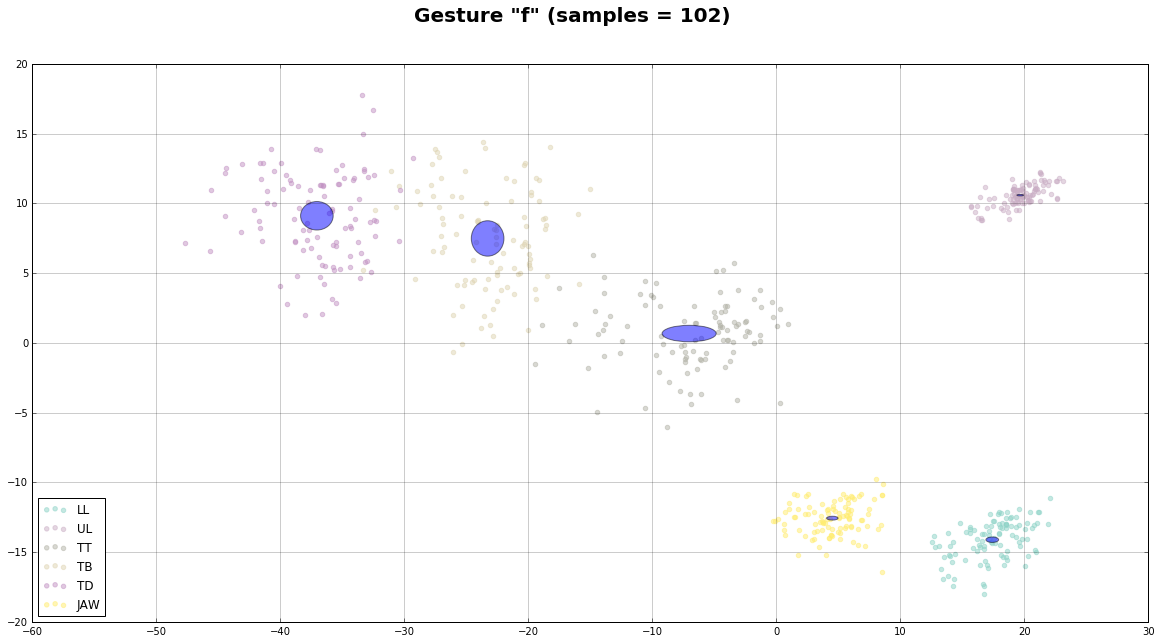

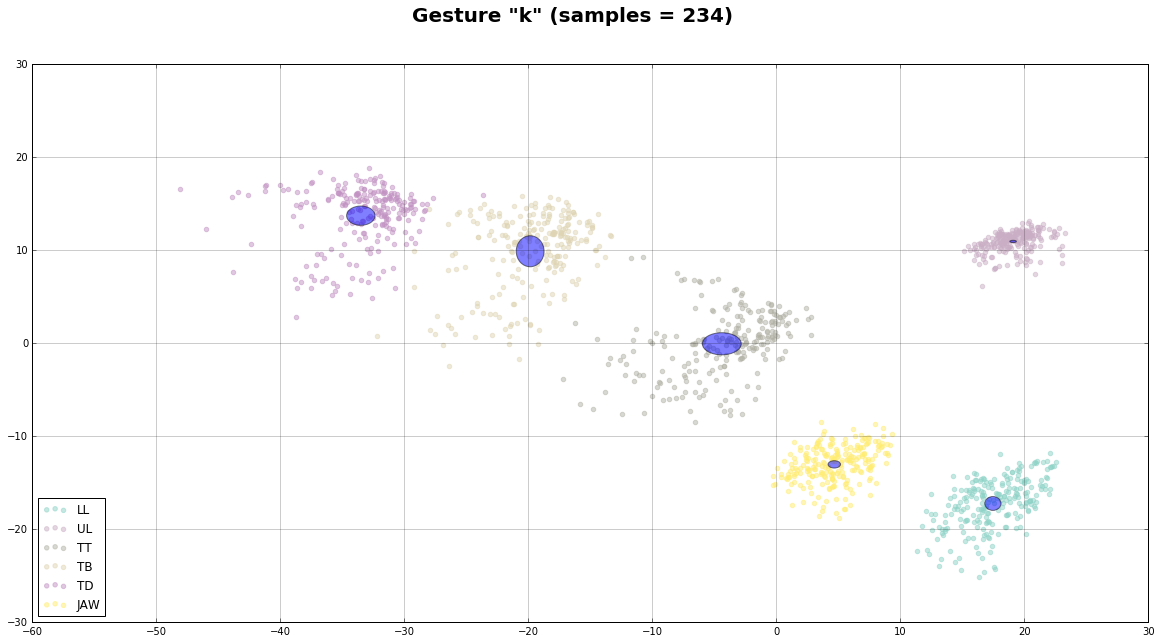

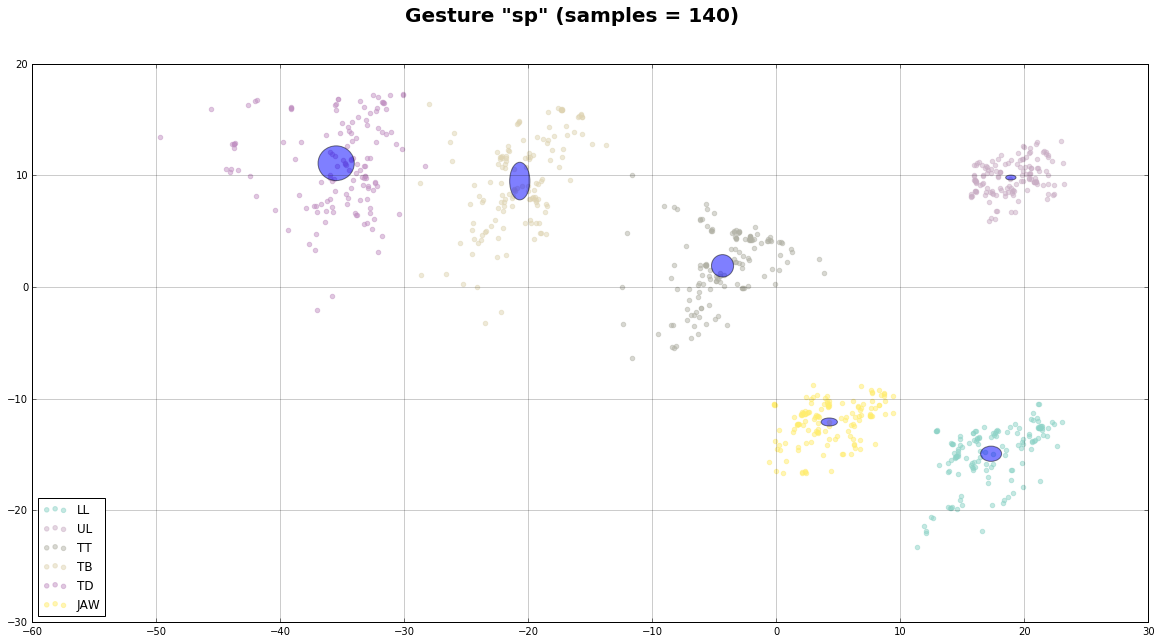

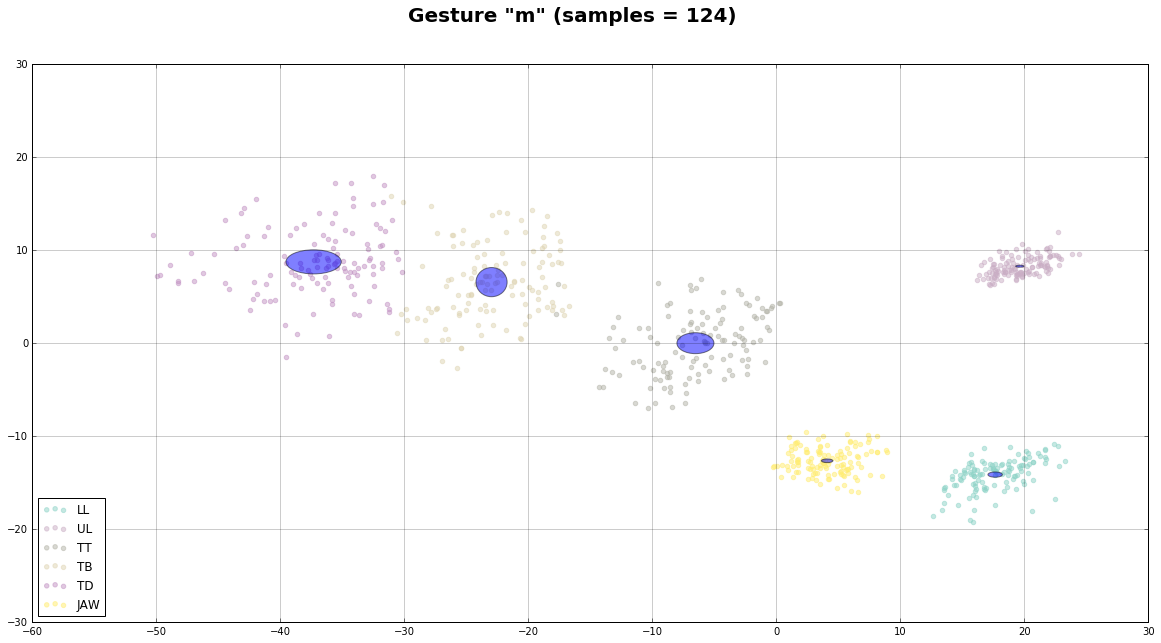

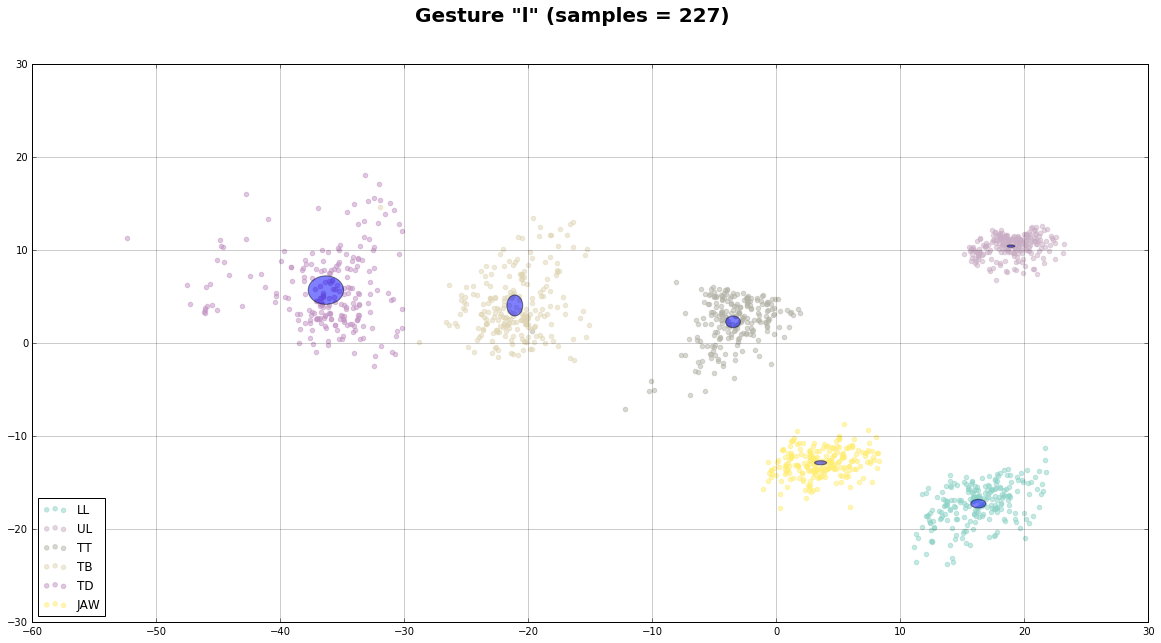

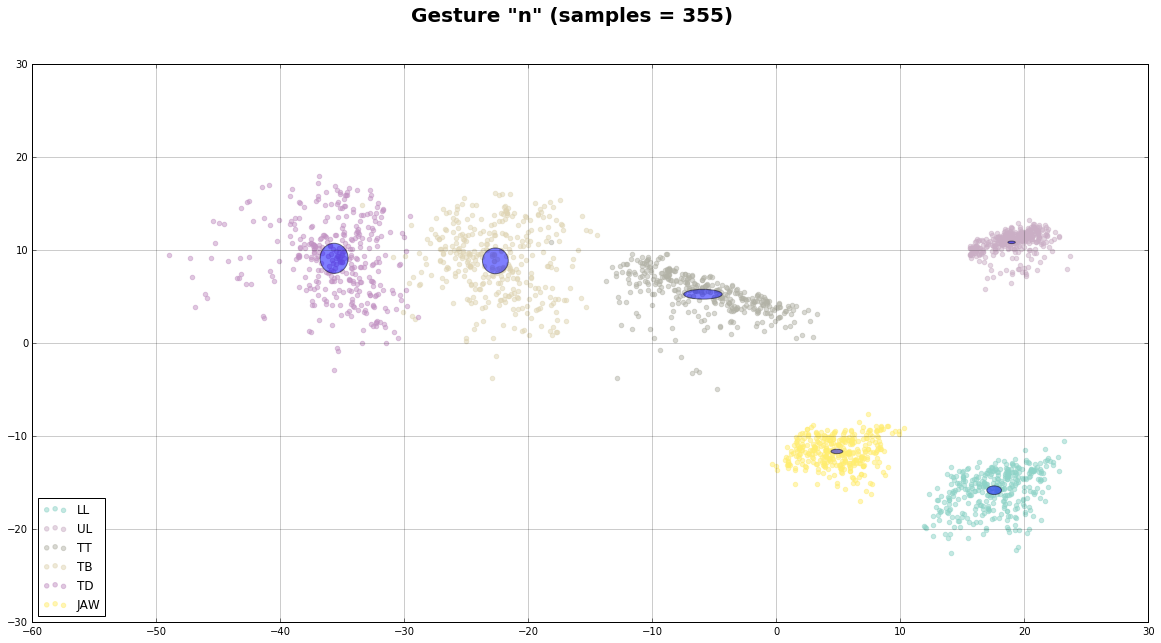

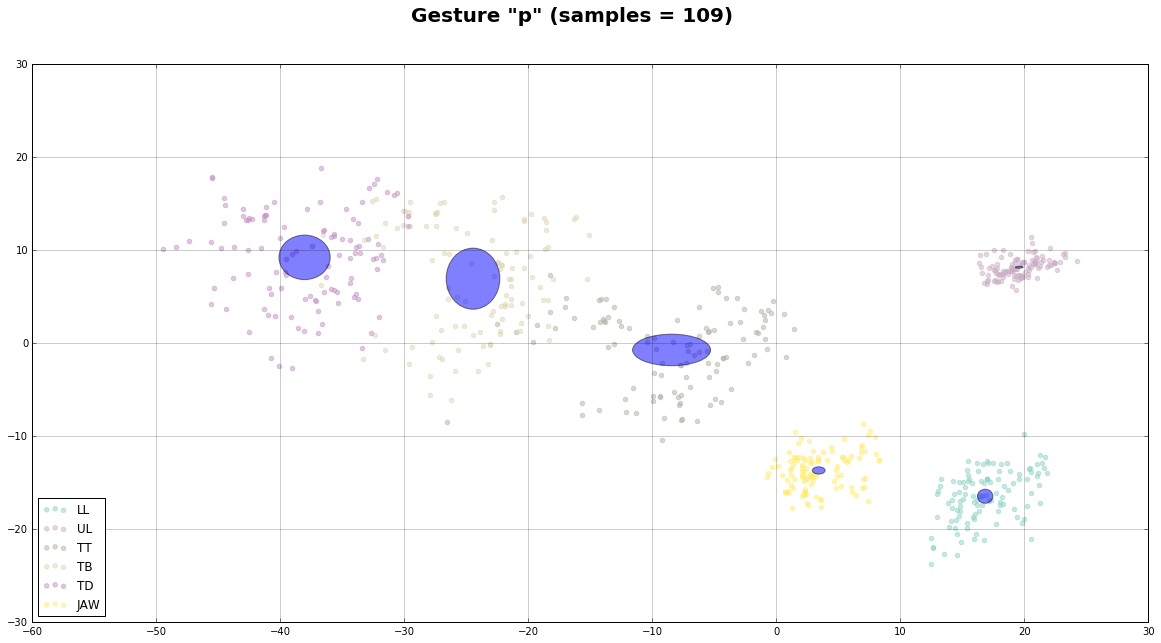

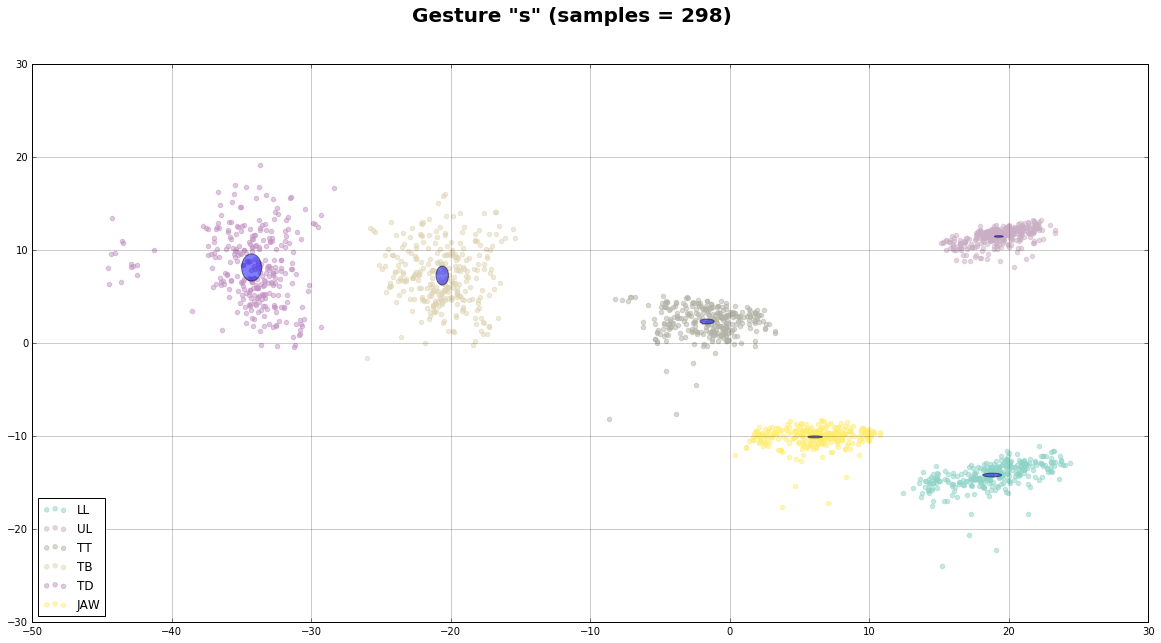

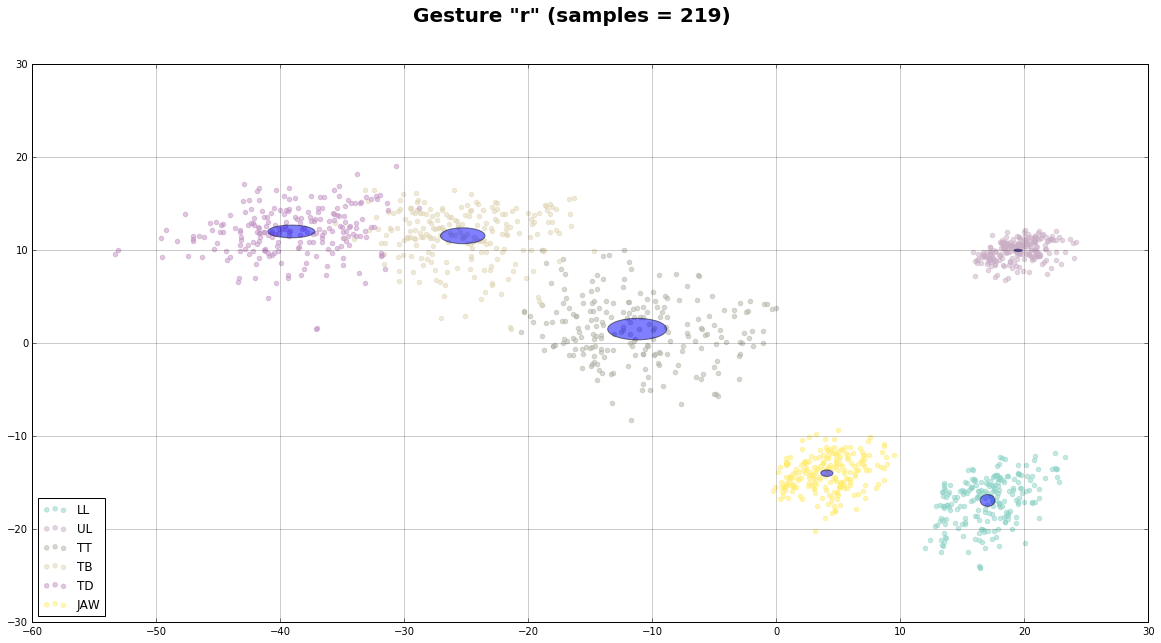

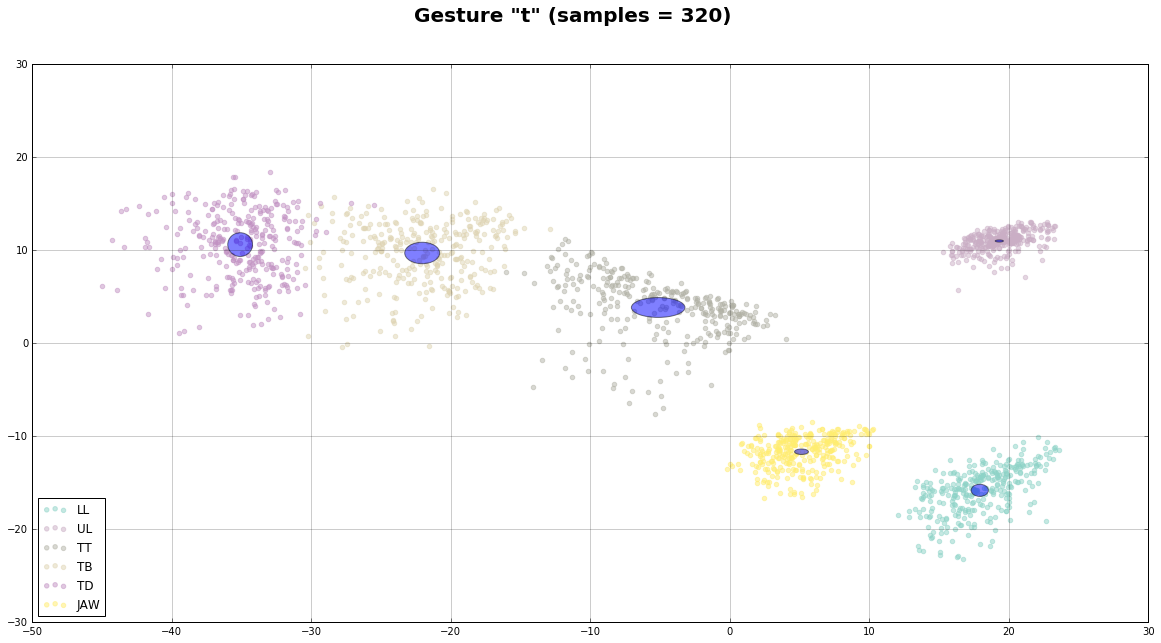

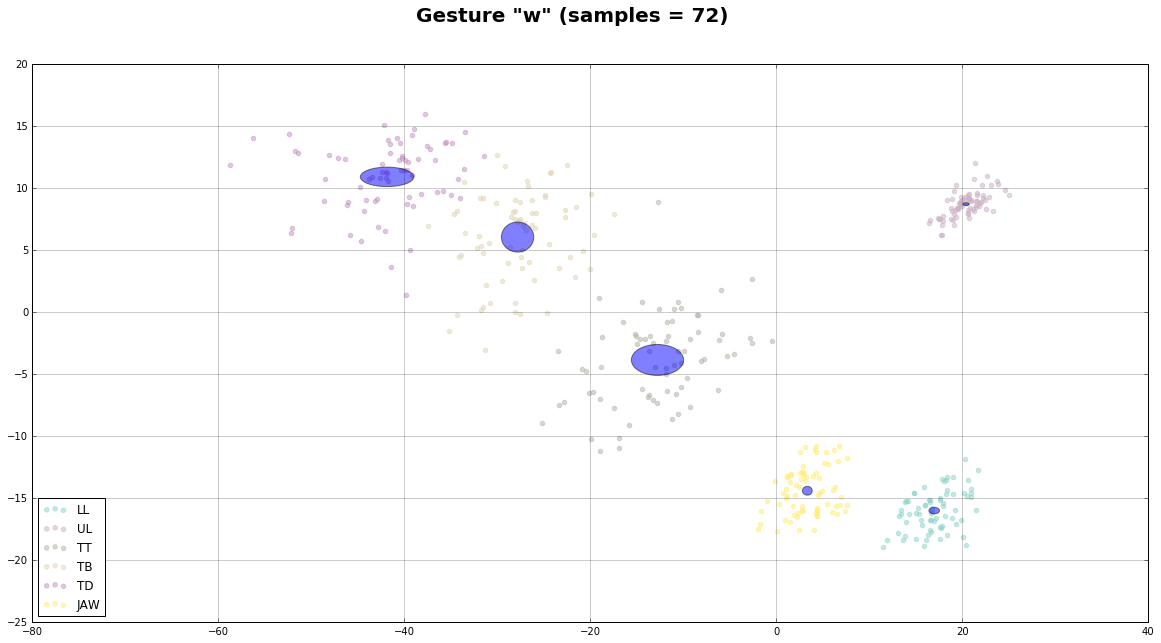

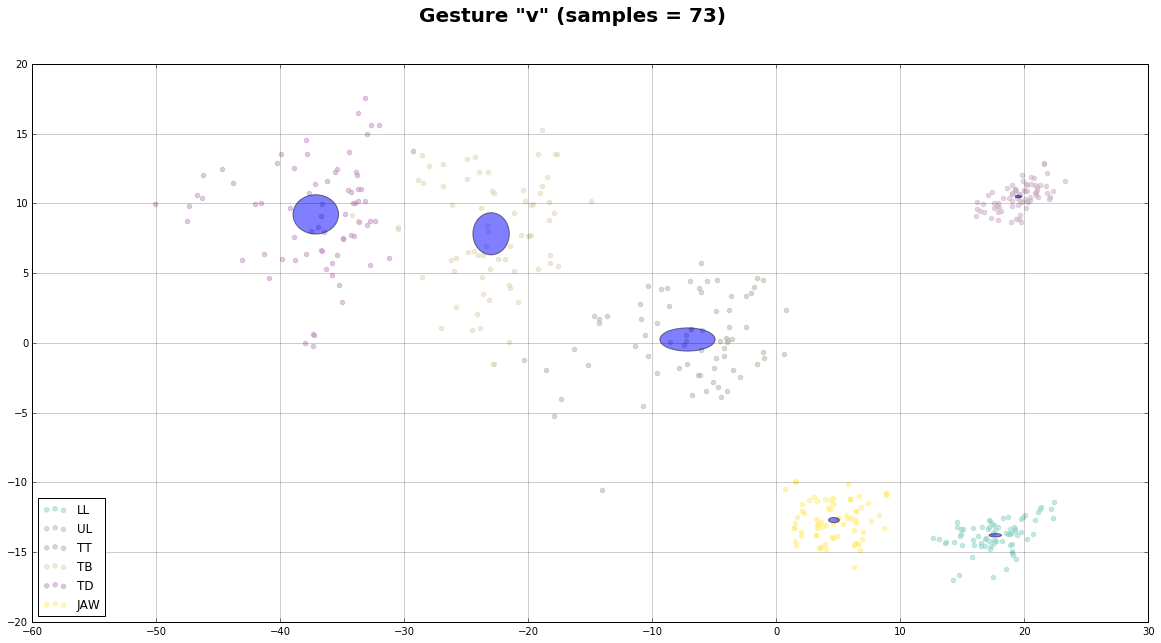

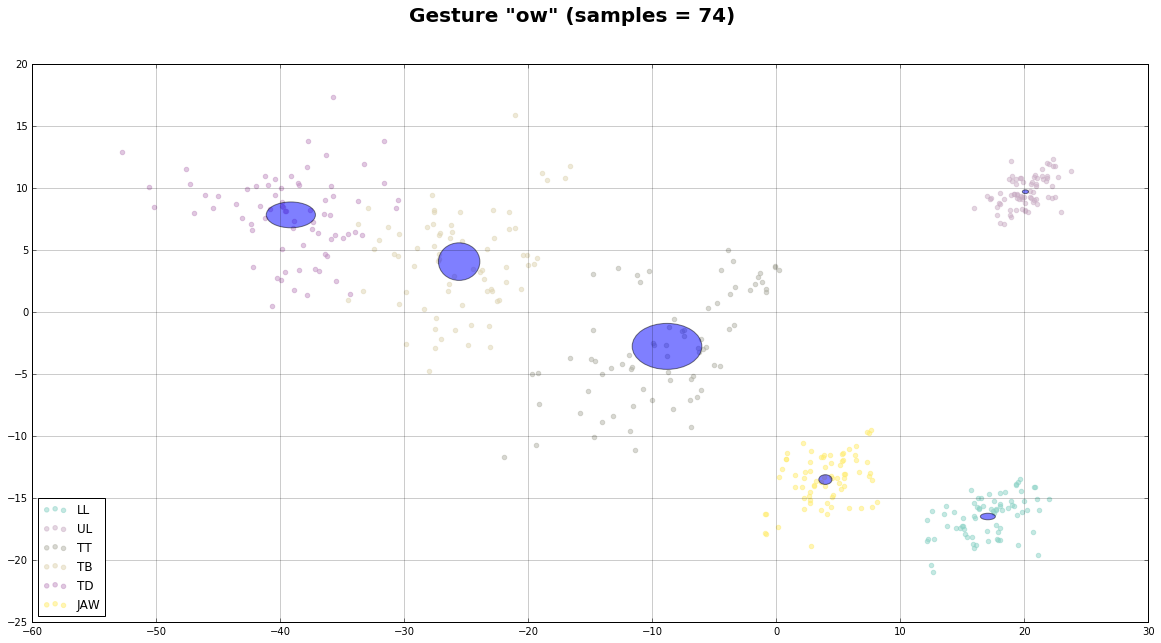

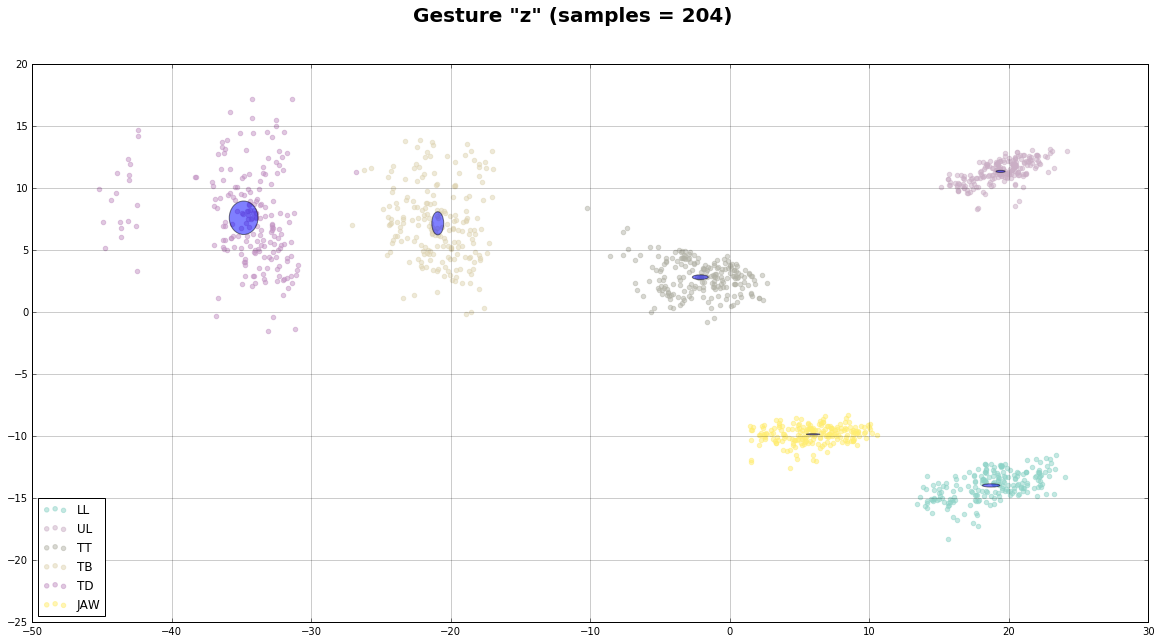

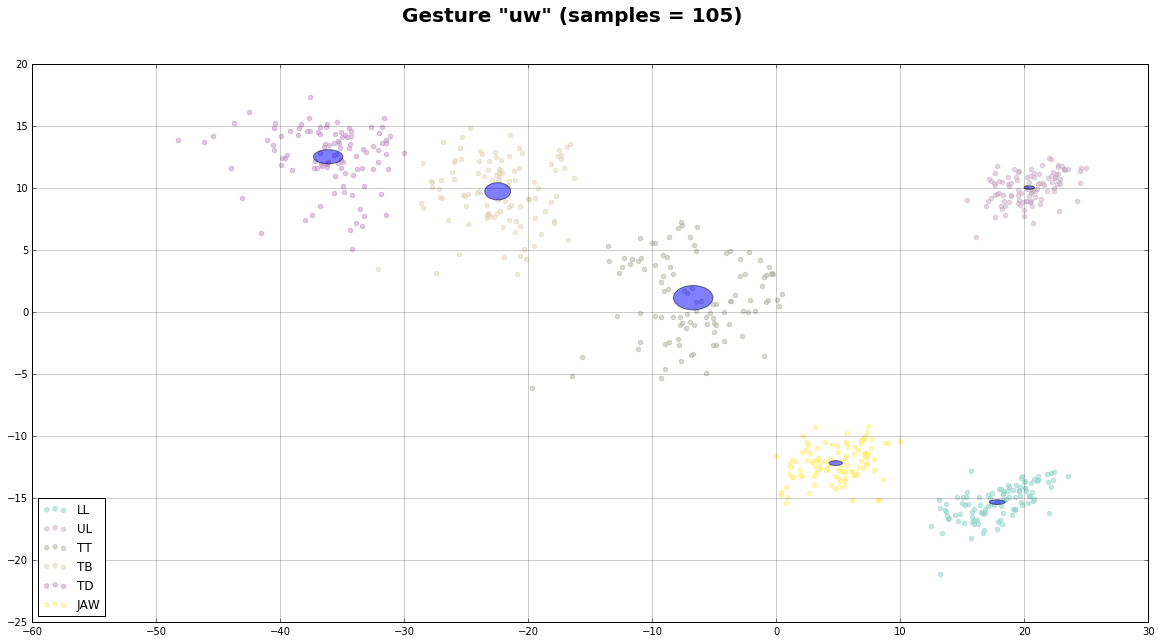

In [14]:
from matplotlib.patches import Ellipse

articulators = ["LL", "UL", "TT", "TB", "TD", "JAW"]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(articulators))]
for g_name, g in gestures.items():
    fig1, ax1 = plt.subplots(figsize=(20, 10))
    fig1.suptitle("Gesture \"{}\" (samples = {})".format(g_name, len(g.params["LL_x"])),
                  fontsize=20, fontweight='bold')
#     ax1.set_xlim(-50, 40)
#     ax1.set_ylim(-30, 30)
    ax1.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
#     img = plt.imread("vt_bg.jpg")
#     ax1.imshow(img, extent=[-100, 40, -70, 50], alpha=0.3)
    g_m = g.get_mean()
    g_v = g.get_variance()
    
    for i in range(len(articulators)):
        a = articulators[i]
        a_x = g.params[a+"_x"]
        a_y = g.params[a+"_y"]
        ax1.scatter(a_x, a_y, color=colors[i], alpha=0.5, label=a)
#         plot mean ellipse
        e = Ellipse(xy=[g_m[a+"_x"], g_m[a+"_y"]],
                    width=g_v[a+"_x"]/5, height=g_v[a+"_y"]/5, alpha=0.5)
        ax1.add_artist(e)
        plt.legend(loc='lower left')
    
    plt.show()

## Normalize Gestures

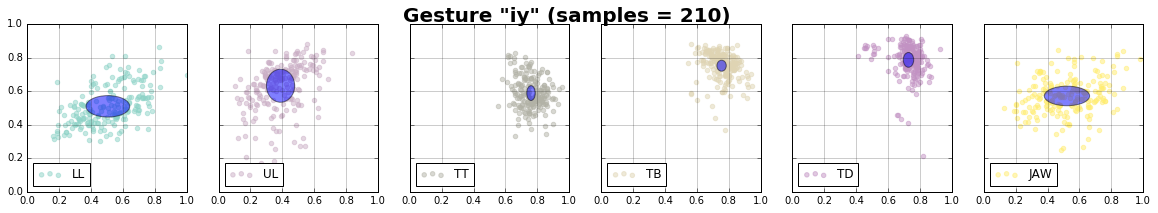

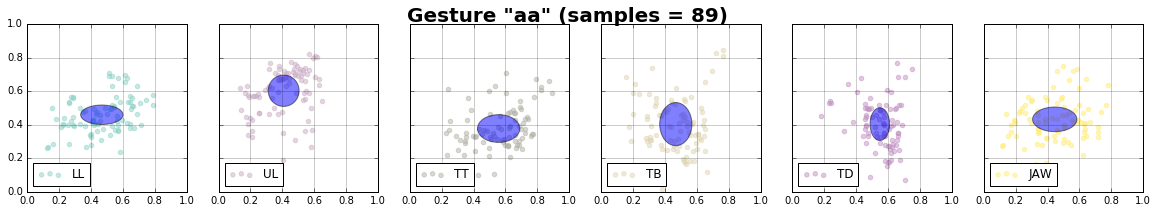

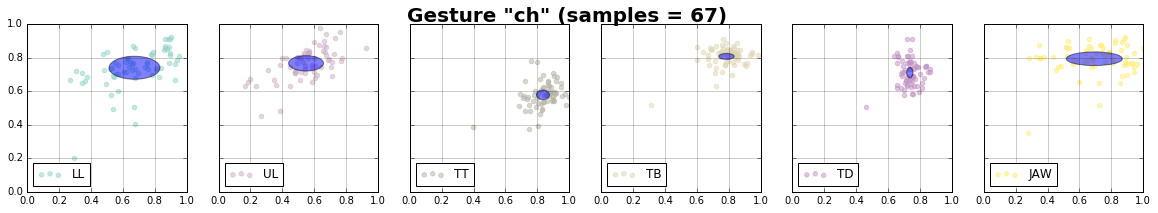

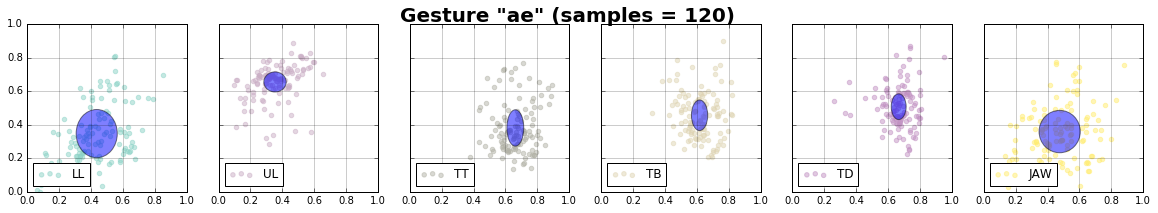

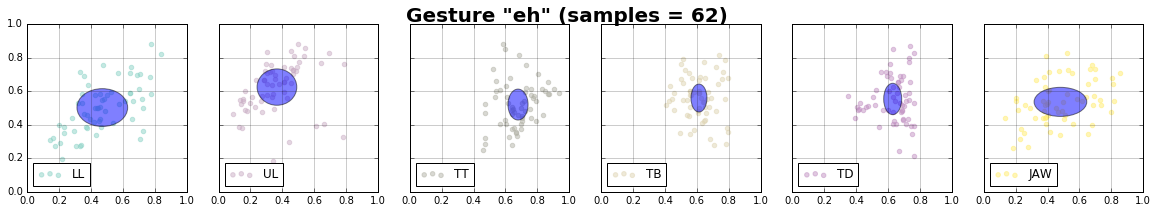

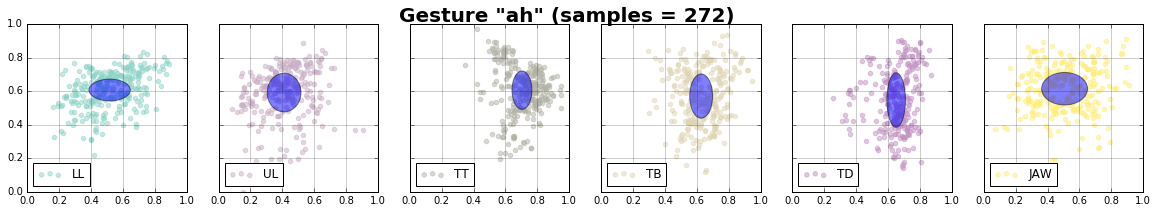

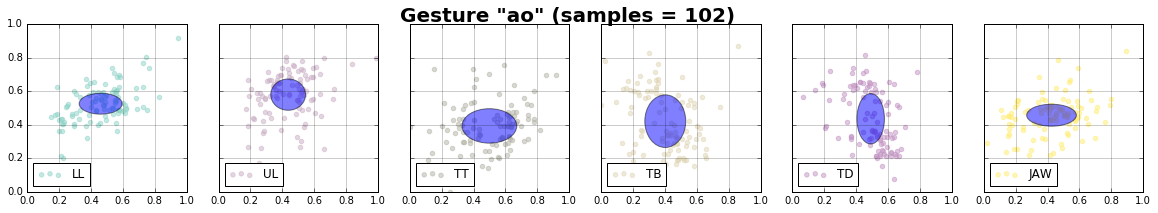

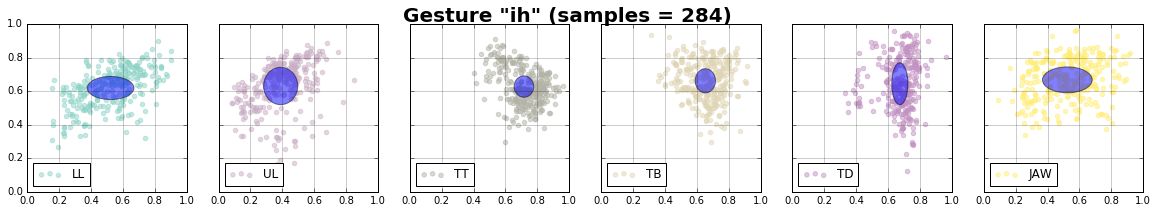

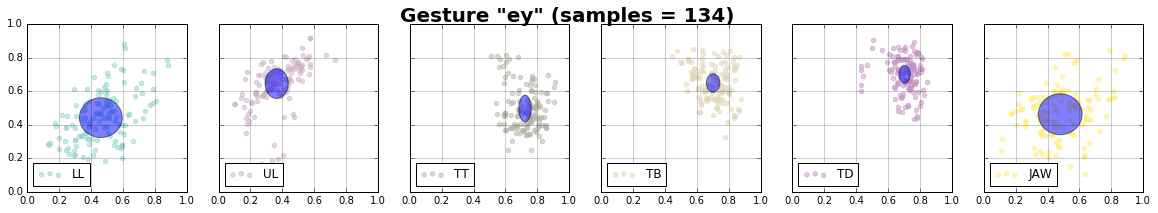

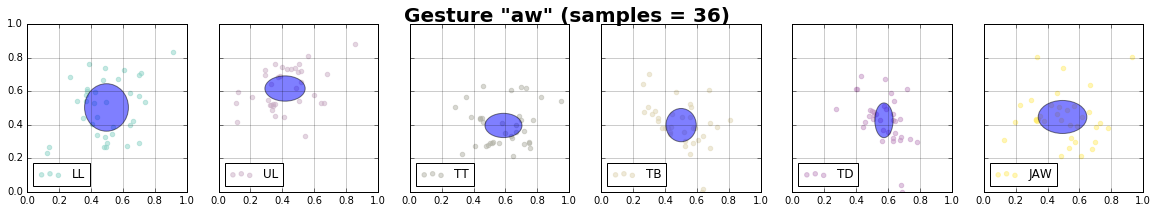

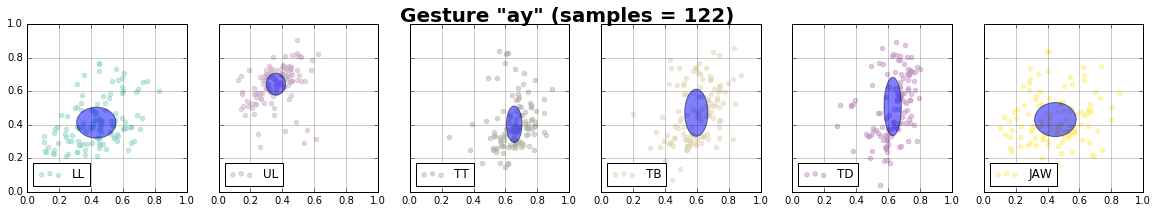

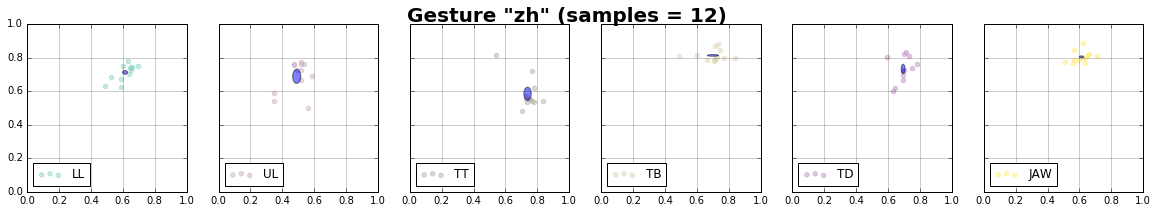

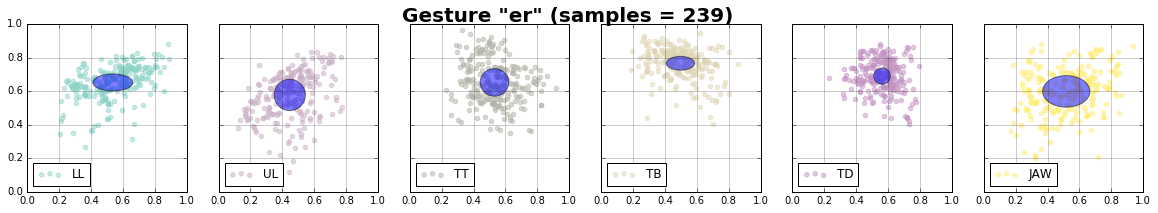

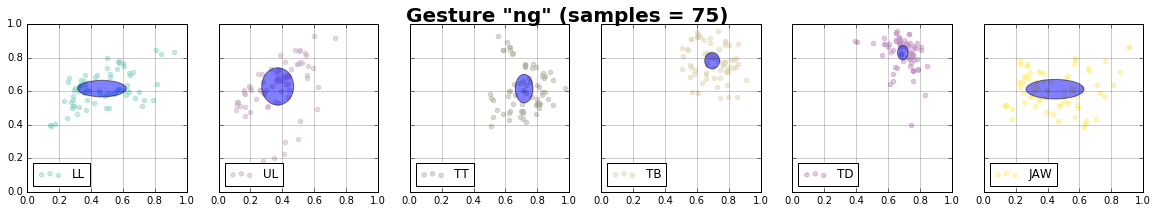

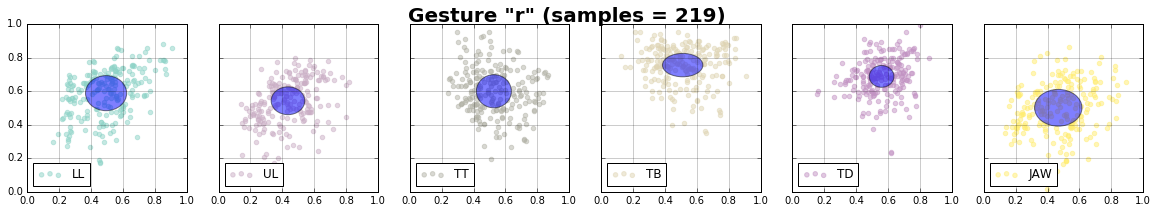

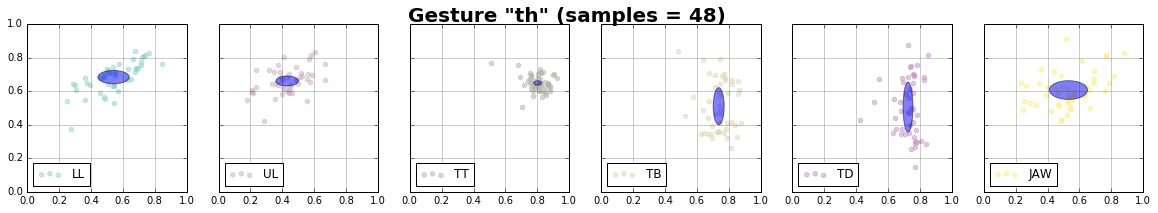

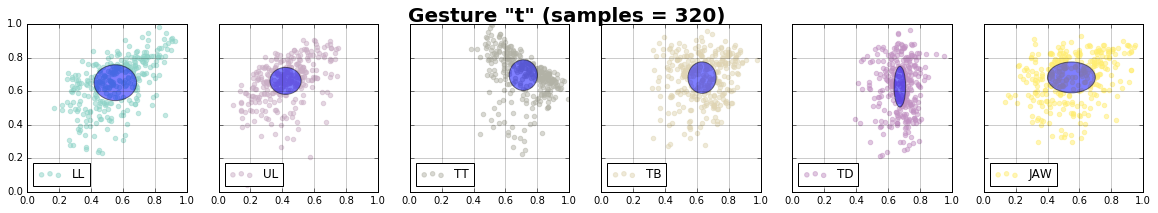

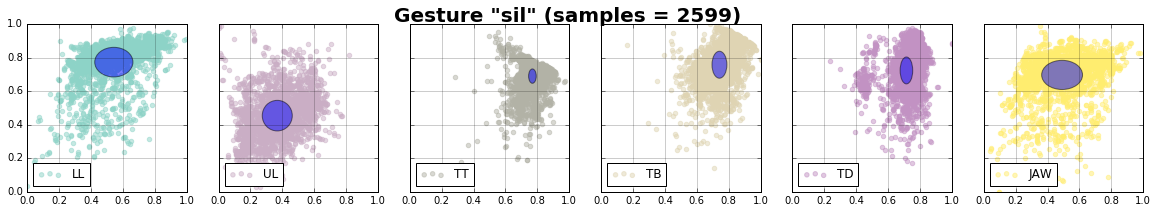

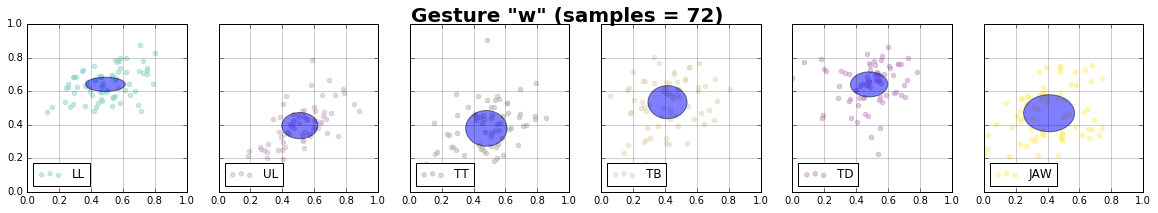

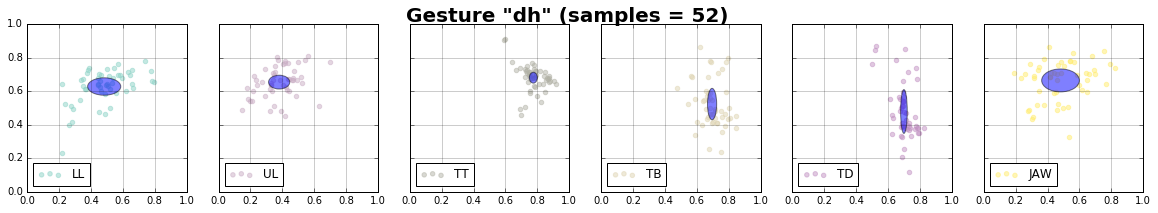

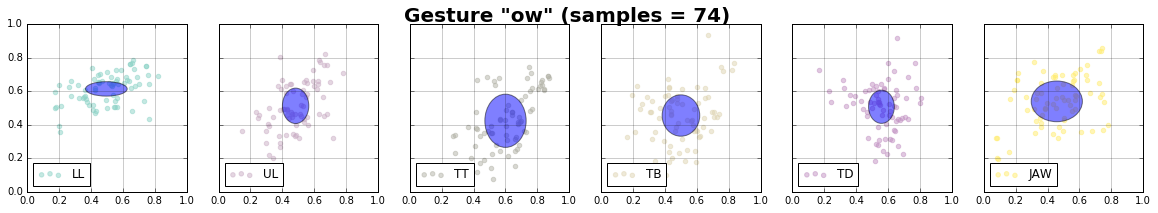

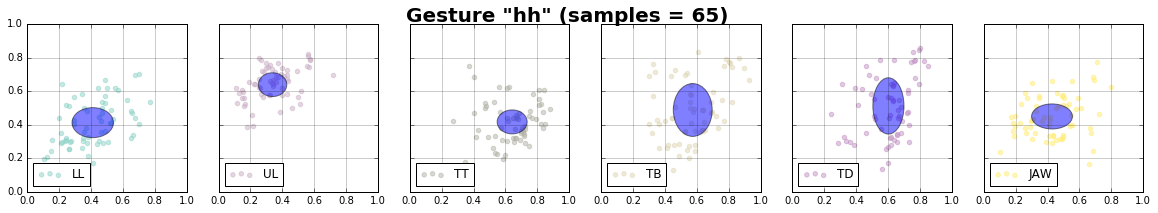

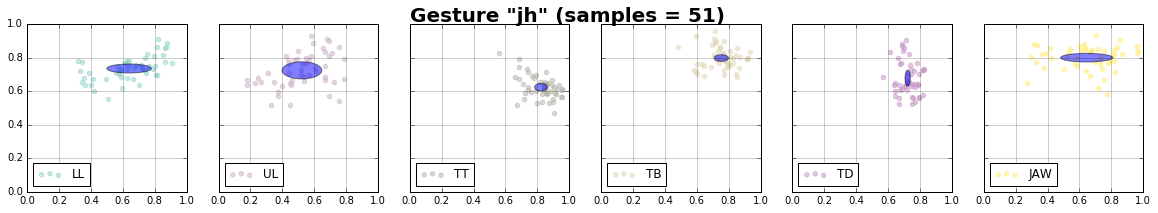

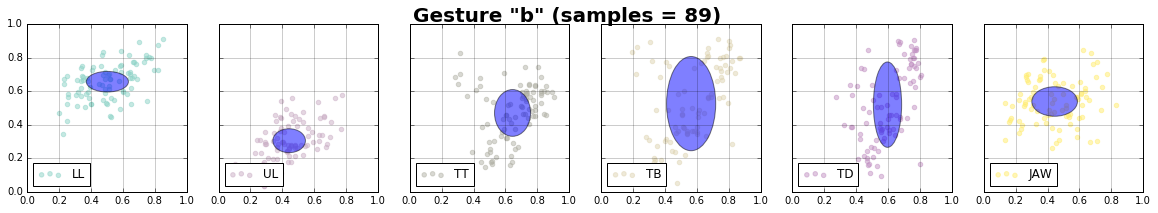

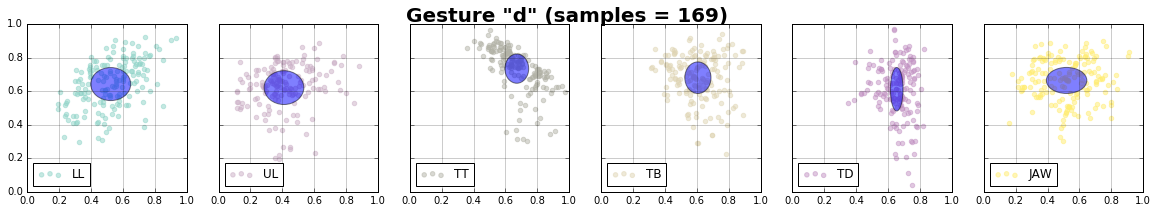

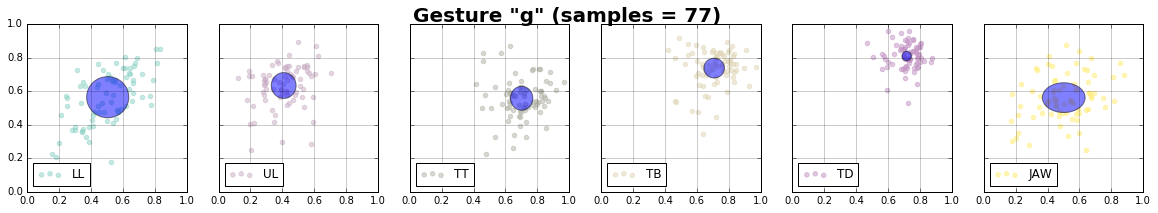

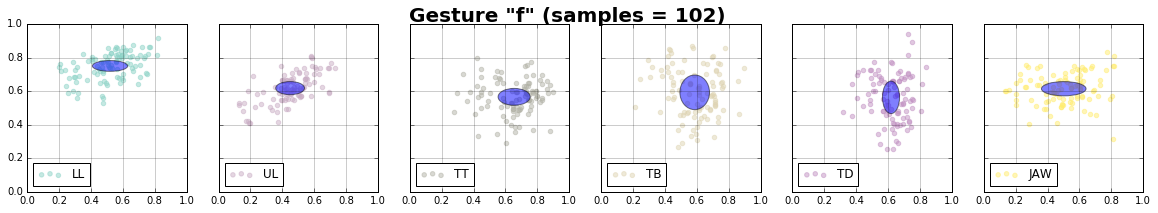

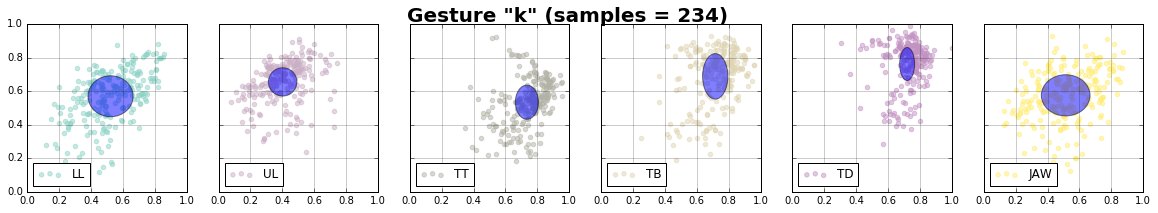

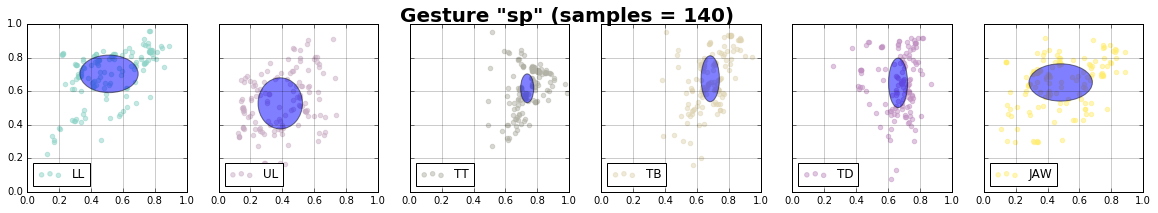

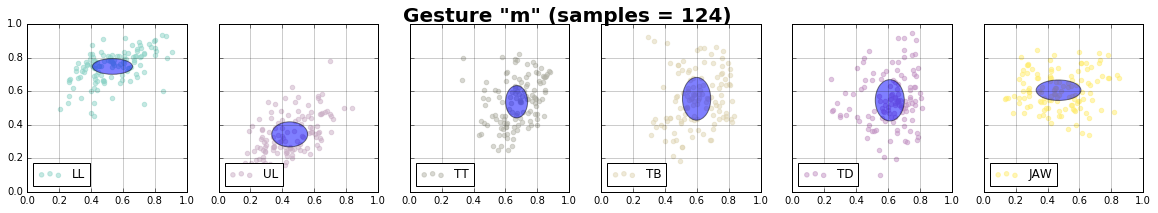

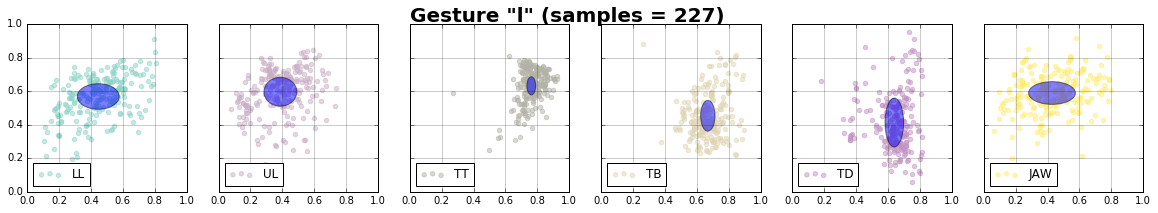

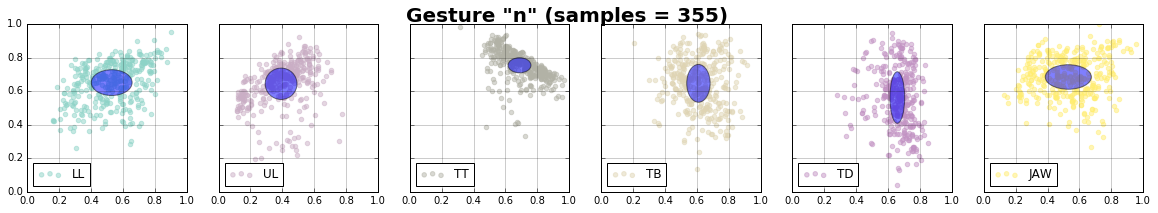

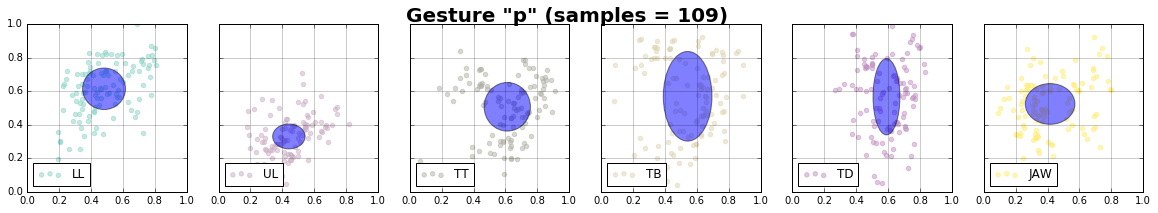

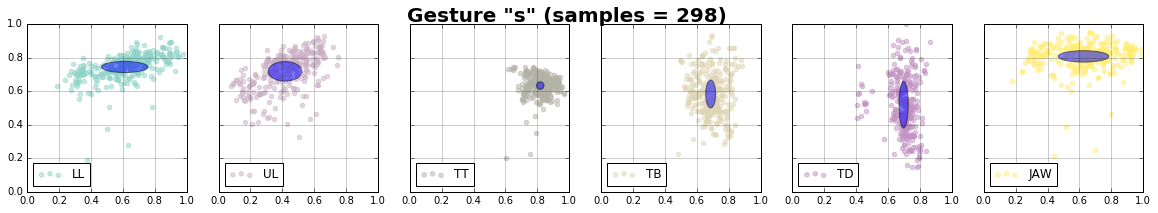

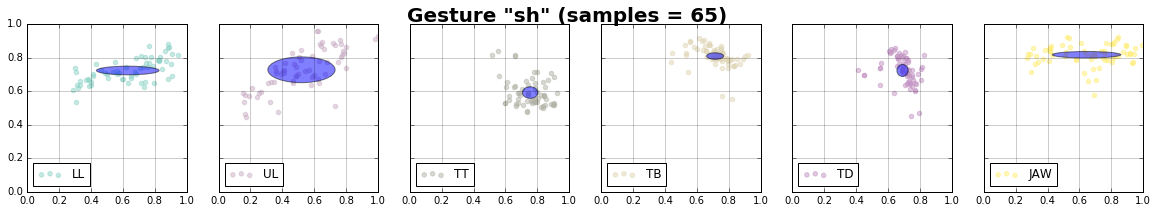

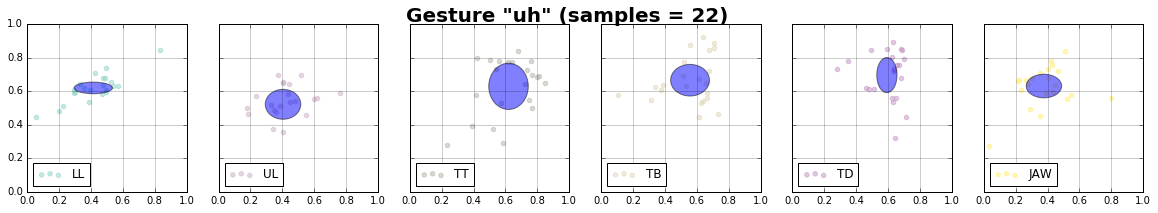

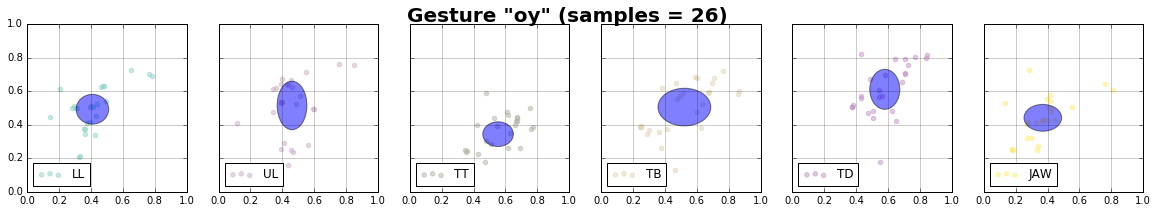

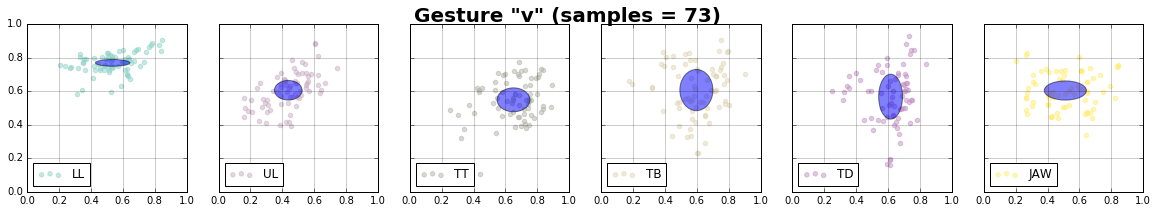

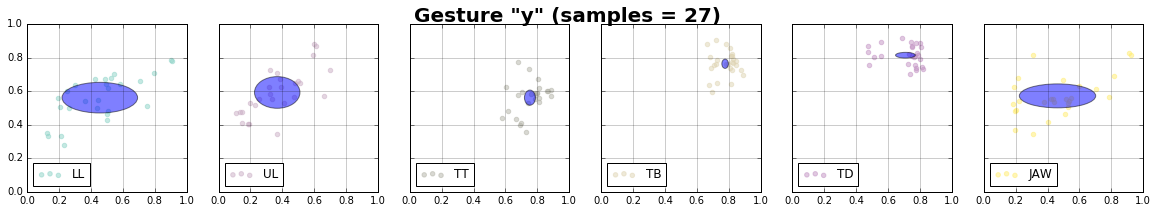

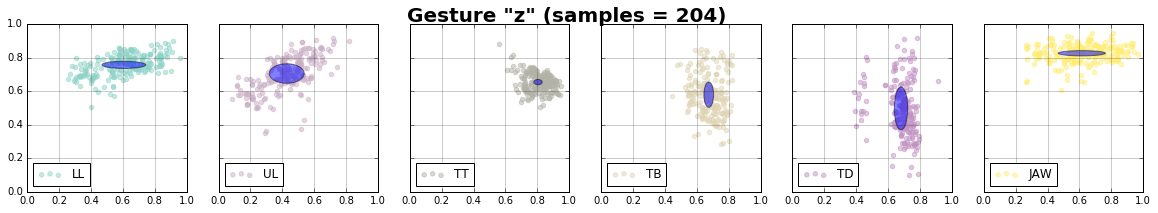

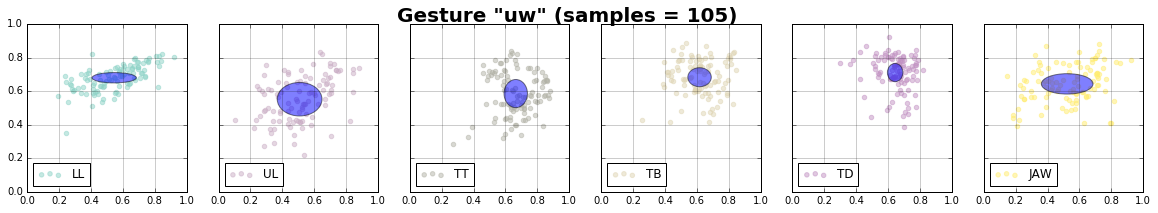

In [15]:
from matplotlib.patches import Ellipse

gestures, p_max, p_min = tist.normalize_gestures(gestures)

articulators = ["LL", "UL", "TT", "TB", "TD", "JAW"]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(articulators))]
for g_name, g in gestures.items():
#     f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig1, ax = plt.subplots(1, len(articulators), sharey=True, figsize=(20, 3))
    fig1.suptitle("Gesture \"{}\" (samples = {})".format(g_name,
                                                         len(g.params["LL_x"])),
                  fontsize=20, fontweight='bold')
    
    g_m = g.get_mean()
    g_v = g.get_variance()
    
    for i in range(len(articulators)):
        ax[i].grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
        ax[i].set_xlim(0, 1)
        ax[i].set_ylim(0, 1)
        a = articulators[i]
        a_x = g.params[a+"_x"]
        a_y = g.params[a+"_y"]
        ax[i].scatter(a_x, a_y, color=colors[i], alpha=0.5, label=a)
#         plot mean ellipse
        e = Ellipse(xy=[g_m[a+"_x"], g_m[a+"_y"]],
                    width=g_v[a+"_x"]*10, height=g_v[a+"_y"]*10, alpha=0.5)
        ax[i].add_artist(e)
        ax[i].legend(loc='lower left')
    
    plt.show()

## Variance analysis

Means and variances calculated succesfully


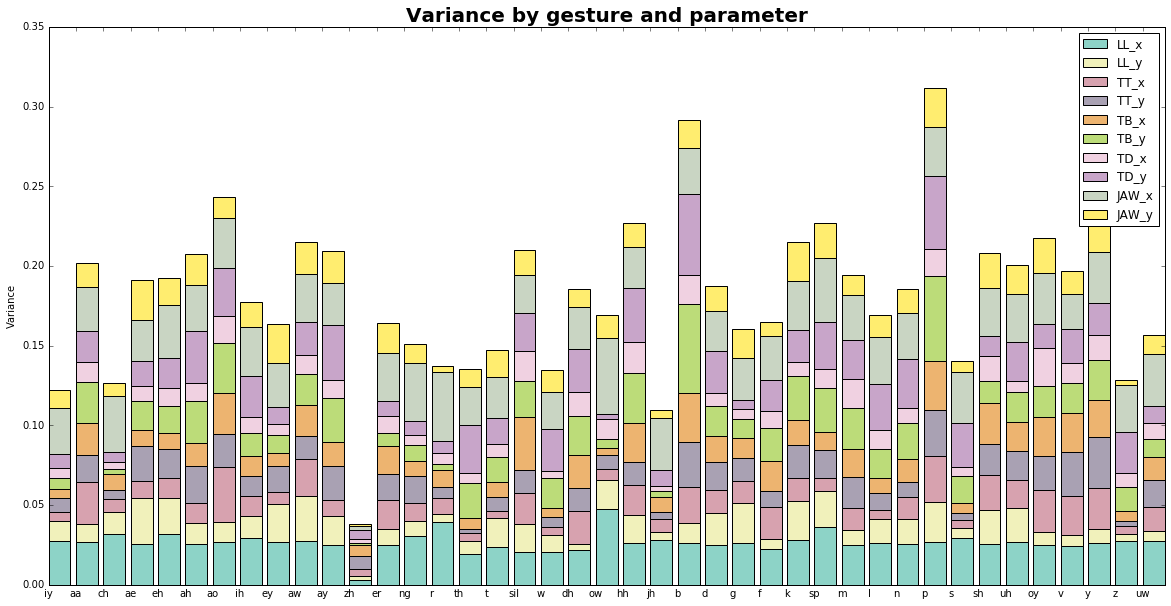

In [16]:
# a stacked bar plot
import numpy as np
import matplotlib.pyplot as plt

articulators = ["LL", "TT", "TB", "TD", "JAW"]
domains=["_x", "_y"]
param_names = [a+d for a in articulators for d in domains]
ind = np.arange(len(gestures))
gestures_norm = gestures
means={}
variances={}
for p in param_names:
    means[p] = {}
    variances[p] = {}   

for g in gestures_norm:
    g_m = gestures_norm[g].get_mean()
    g_v = gestures_norm[g].get_variance()
    for p in param_names:
        means[p][g] = g_m[p]*(p_max[p]-p_min[p]) + p_min[p]
        variances[p][g] = g_v[p]

print "Means and variances calculated succesfully"

# plor variances
fig1, ax = plt.subplots(figsize=(20, 10))
cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(param_names))]

acc = [0]*len(gestures)
for i in range(len(param_names)):
    p = param_names[i]
    plt.bar(ind, variances[p].values(), width=0.8, color=colors[i], bottom=acc, label=p)
    acc = [x + y for x,y in zip(variances[p].values(), acc)]
    legend()


plt.ylabel('Variance')
plt.title('Variance by gesture and parameter', fontsize=20, fontweight='bold')
plt.xticks(np.arange(len(gestures)), gestures.keys())
plt.autoscale()
plt.show()

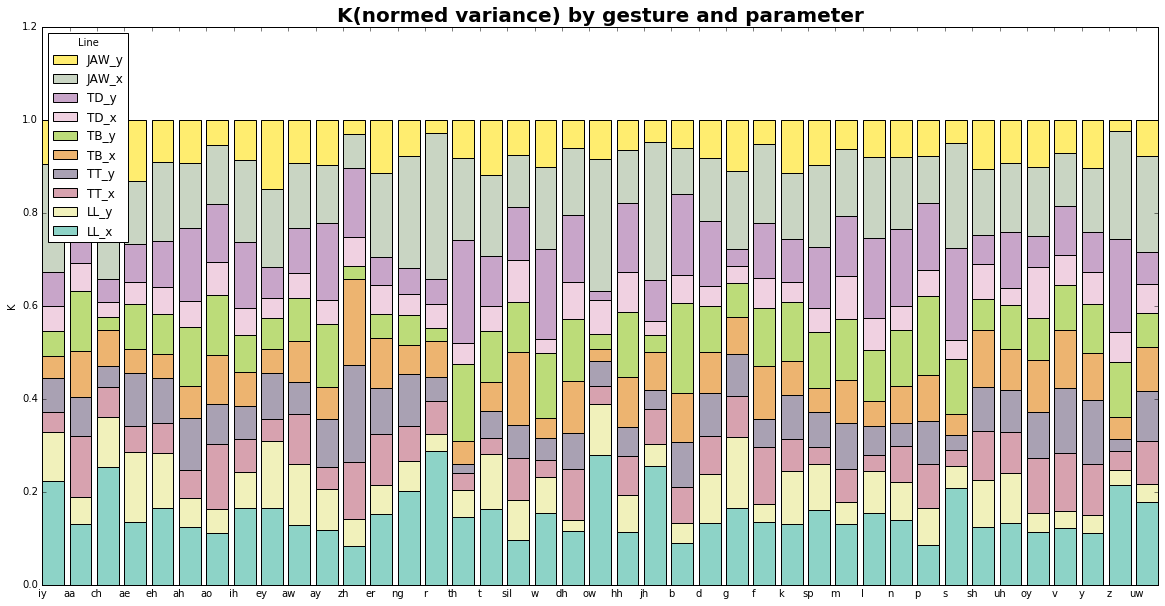

In [17]:
# plor variances
fig1, ax = plt.subplots(figsize=(20, 10))
cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(param_names))]

acc1 = [0]*len(gestures)
for i in range(len(param_names)):
    p = param_names[i]
    normed = [x/y for x,y in zip(variances[p].values(), acc)]
    plt.bar(ind, normed, width=0.8, color=colors[i], bottom=acc1, label=p)
    acc1 = [x + y for x,y in zip(normed, acc1)]
    legend()

plt.ylabel('K')
plt.title('K(normed variance) by gesture and parameter', fontsize=20, fontweight='bold')
plt.xticks(np.arange(len(gestures)), gestures.keys())
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.autoscale()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
plt.show()

 IMPORTANT: Do not normalize variance like this. Different sum of variances just means that some gestures demand more precise articulation than others.

## Calc overall mean and variance for each parameter

gestures calculation finished
Means and variances calculated succesfully


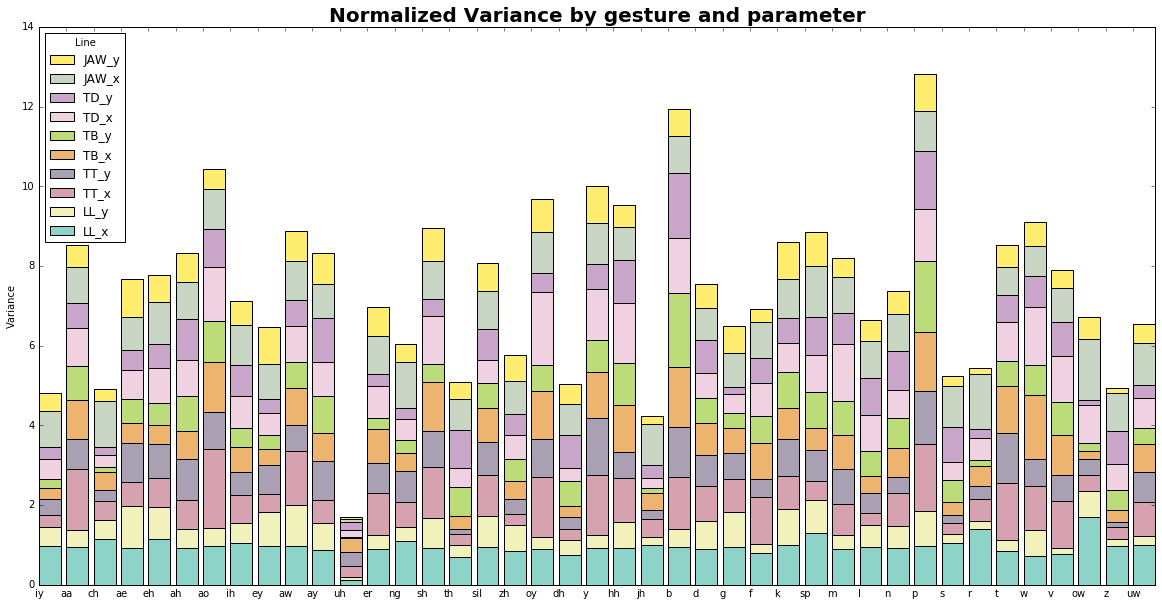

In [18]:
gestures = {}

overall_ges = ges.Gesture("overall")

for fname in os.listdir(trans_dir):
    fname = os.path.splitext(fname)[0]
    t_fname = os.path.join(trans_dir, fname + ".trans")
    mat_fname = os.path.join(mat_dir, fname + ".mat")
    gest = tist.calc_gestures(mat_fname, t_fname, filter_critical_points=True, m=0.03 )
    for g in gest:
        if g not in gestures:
            gestures[g] = ges.Gesture(g)
        gestures[g].extend(gest[g])
        overall_ges.extend(gest[g])
        
print "gestures calculation finished"

gestures_norm = gestures
means={}
variances={}
for p in param_names:
    means[p] = {}
    variances[p] = {}   

for g in gestures_norm:
    g_m = gestures_norm[g].get_mean()
    g_v = gestures_norm[g].get_variance()
    for p in param_names:
        means[p][g] = g_m[p]*(p_max[p]-p_min[p]) + p_min[p]
        variances[p][g] = g_v[p]
        
print "Means and variances calculated succesfully"

overall_variance = overall_ges.get_variance()

# plot variances
fig1, ax = plt.subplots(figsize=(20, 10))
cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(param_names))]

acc = [0]*len(gestures)
for i in range(len(param_names)):
    p = param_names[i]
    normed = [x/overall_variance[p] for x in variances[p].values()]
    plt.xticks(np.arange(len(gestures)),variances[p].values())
    plt.bar(ind, normed, width=0.8, color=colors[i], bottom=acc, label=p)
    acc = [x + y for x,y in zip(normed, acc)]
    legend()


plt.ylabel('Variance')
plt.title('Normalized Variance by gesture and parameter', fontsize=20, fontweight='bold')
plt.xticks(np.arange(len(gestures)), gestures.keys())
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
plt.autoscale()
plt.show()

This is a really good graph. For each gesture, articulator with minimum variance is indeed the most important. At least in majority of cases. It is also notable that voiced consonants have less variance than unvoiced in general, though the distribution of variances for them look similar.